<a href="https://colab.research.google.com/github/imanubhav/Railway-Complaint-Categorisation/blob/master/Railway_Innovative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
copied_path = "drive/My Drive/data.csv" #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path)

In [0]:
data.columns=['Text','Time','Complaint','Complaint Sub Type']

In [0]:
df=data

In [0]:
df=df.drop(labels=['Time',"Complaint Sub Type"],axis=1)

In [0]:
df=df[df.Complaint!="Accident Claims"]
df=df[df.Complaint!="Feedback&Suggestions"]
df=df[df.Complaint!="Complaint Related To Kolkata Metro"]
df=df[df.Complaint!="\\N"]
df=df[df.Complaint!="Security"]
df=df[df.Complaint!="WIFI Service"]
df=df[df.Complaint!="Publicity"]
df=df[df.Complaint!="Complaints related to Sleeper Class"]
df=df[df.Complaint!="YMisc. Cause"]

In [0]:
#combinining classes
df.Complaint.replace(["Passenger Booking","Reservation Issues","Working of Enquiry Offices","Allotment of seats - berths by train staff","Refund of tickets"],"Reservation/Enquiry_Office Issues",inplace=True)
df.Complaint.replace(["Maintenance / Cleanliness of coaches","Cleanliness at Station"],"Maintenance / Cleanliness",inplace=True)
df.Complaint.replace(["Improper behaviour of commercial staff","Improper behaviour of non commercial staff","Improper behaviour of non railway staff"],"Improper behaviour of non railway/railway staff",inplace=True)

In [0]:
df=df[df.Complaint!="Parking"]
df=df[df.Complaint!="Retiring Room (ONLINE)"]
df=df[df.Complaint!="Multiple complaints"]

In [0]:
df.Complaint.value_counts()

Malfunctioning of Electrical Equipment             44346
Maintenance / Cleanliness                          42005
Punctuality of Train                               39848
Non availability of Water Sub                      22743
Catering and Vending Services                      17303
Unauthorised passengers in coaches                 13227
Reservation/Enquiry_Office Issues                  11998
Bedroll Complaints                                  9714
Improper behaviour of non railway/railway staff     7089
Booking of Luggage / Parcels / Goods                6321
Feedback/Suggestions                                2295
Thefts / Pilferages                                 1545
Bribery and corruption                               882
Emergency Assistance                                 504
Name: Complaint, dtype: int64

In [0]:
arr=np.unique(df.Complaint.values)
com_dict=dict([(v,k) for k,v in dict(enumerate(arr)).items()])
df['complaint_id']=df['Complaint'].map(com_dict)

In [0]:
stopwords_hindi="a,aadi,aaj,aap,aapne,aata,aati,aaya,aaye,ab,abbe,abbey,abe,abhi,able,about,above,accha,according,accordingly,acha,achcha,across,actually,after,afterwards,again,against,agar,ain,aint,ain't,aisa,aise,aisi,alag,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,andar,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,ap,apan,apart,apna,apnaa,apne,apni,appear,are,aren,arent,aren't,around,arre,as,aside,ask,asking,at,aur,avum,aya,aye,baad,baar,bad,bahut,bana,banae,banai,banao,banaya,banaye,banayi,banda,bande,bandi,bane,bani,bas,bata,batao,bc,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,below,beside,besides,best,better,between,beyond,bhai,bheetar,bhi,bhitar,bht,bilkul,bohot,bol,bola,bole,boli,bolo,bolta,bolte,bolti,both,brief,bro,btw,but,by,came,can,cannot,cant,can't,cause,causes,certain,certainly,chahiye,chaiye,chal,chalega,chhaiye,clearly,c'mon,com,come,comes,could,couldn,couldnt,couldn't,d,de,dede,dega,degi,dekh,dekha,dekhe,dekhi,dekho,denge,dhang,di,did,didn,didnt,didn't,dijiye,diya,diyaa,diye,diyo,do,does,doesn,doesnt,doesn't,doing,done,dono,dont,don't,doosra,doosre,down,downwards,dude,dunga,dungi,during,dusra,dusre,dusri,dvaara,dvara,dwaara,dwara,each,edu,eg,eight,either,ek,else,elsewhere,enough,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,fir,first,five,followed,following,follows,for,forth,four,from,further,furthermore,gaya,gaye,gayi,get,gets,getting,ghar,given,gives,go,goes,going,gone,good,got,gotten,greetings,haan,had,hadd,hadn,hadnt,hadn't,hai,hain,hamara,hamare,hamari,hamne,han,happens,har,hardly,has,hasn,hasnt,hasn't,have,haven,havent,haven't,having,he,hello,help,hence,her,here,hereafter,hereby,herein,here's,hereupon,hers,herself,he's,hi,him,himself,his,hither,hm,hmm,ho,hoga,hoge,hogi,hona,honaa,hone,honge,hongi,honi,hopefully,hota,hotaa,hote,hoti,how,howbeit,however,hoyenge,hoyengi,hu,hua,hue,huh,hui,hum,humein,humne,hun,huye,huyi,i,i'd,idk,ie,if,i'll,i'm,imo,in,inasmuch,inc,inhe,inhi,inho,inka,inkaa,inke,inki,inn,inner,inse,insofar,into,inward,is,ise,isi,iska,iskaa,iske,iski,isme,isn,isne,isnt,isn't,iss,isse,issi,isski,it,it'd,it'll,itna,itne,itni,itno,its,it's,itself,ityaadi,ityadi,i've,ja,jaa,jab,jabh,jaha,jahaan,jahan,jaisa,jaise,jaisi,jata,jayega,jidhar,jin,jinhe,jinhi,jinho,jinhone,jinka,jinke,jinki,jinn,jis,jise,jiska,jiske,jiski,jisme,jiss,jisse,jitna,jitne,jitni,jo,just,jyaada,jyada,k,ka,kaafi,kab,kabhi,kafi,kaha,kahaa,kahaan,kahan,kahi,kahin,kahte,kaisa,kaise,kaisi,kal,kam,kar,kara,kare,karega,karegi,karen,karenge,kari,karke,karna,karne,karni,karo,karta,karte,karti,karu,karun,karunga,karungi,kaun,kaunsa,kayi,kch,ke,keep,keeps,keh,kehte,kept,khud,ki,kin,kine,kinhe,kinho,kinka,kinke,kinki,kinko,kinn,kino,kis,kise,kisi,kiska,kiske,kiski,kisko,kisliye,kisne,kitna,kitne,kitni,kitno,kiya,kiye,know,known,knows,ko,koi,kon,konsa,koyi,krna,krne,kuch,kuchch,kuchh,kul,kull,kya,kyaa,kyu,kyuki,kyun,kyunki,lagta,lagte,lagti,last,lately,later,le,least,lekar,lekin,less,lest,let,let's,li,like,liked,likely,little,liya,liye,ll,lo,log,logon,lol,look,looking,looks,ltd,lunga,m,maan,maana,maane,maani,maano,magar,mai,main,maine,mainly,mana,mane,mani,mano,many,mat,may,maybe,me,mean,meanwhile,mein,mera,mere,merely,meri,might,mightn,mightnt,mightn't,mil,mjhe,more,moreover,most,mostly,much,mujhe,must,mustn,mustnt,mustn't,my,myself,na,naa,naah,nahi,nahin,nai,name,namely,nd,ne,near,nearly,necessary,neeche,need,needn,neednt,needn't,needs,neither,never,nevertheless,new,next,nhi,nine,no,nobody,non,none,noone,nope,nor,normally,not,nothing,novel,now,nowhere,o,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,par,pata,pe,pehla,pehle,pehli,people,per,perhaps,phla,phle,phli,placed,please,plus,poora,poori,provides,pura,puri,q,que,quite,raha,rahaa,rahe,rahi,rakh,rakha,rakhe,rakhen,rakhi,rakho,rather,re,really,reasonably,regarding,regardless,regards,rehte,rha,rhaa,rhe,rhi,ri,right,s,sa,saara,saare,saath,sab,sabhi,sabse,sahi,said,sakta,saktaa,sakte,sakti,same,sang,sara,sath,saw,say,saying,says,se,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,shan,shant,shan't,she,she's,should,shouldn,shouldnt,shouldn't,should've,si,since,six,so,soch,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,still,sub,such,sup,sure,t,tab,tabh,tak,take,taken,tarah,teen,teeno,teesra,teesre,teesri,tell,tends,tera,tere,teri,th,tha,than,thank,thanks,thanx,that,that'll,thats,that's,the,theek,their,theirs,them,themselves,then,thence,there,thereafter,thereby,therefore,therein,theres,there's,thereupon,these,they,they'd,they'll,they're,they've,thi,thik,thing,think,thinking,third,this,tho,thoda,thodi,thorough,thoroughly,those,though,thought,three,through,throughout,thru,thus,tjhe,to,together,toh,too,took,toward ,towards,tried,tries,true,truly,try,trying,tu,tujhe,tum,tumhara,tumhare,tumhari,tune,twice,two,um,umm,un,under,unhe,unhi,unho,unhone,unka,unkaa,unke,unki,unko,unless,unlikely,unn,unse,until,unto,up,upar,upon,us,use,used,useful,uses,usi,using,uska,uske,usne,uss,usse,ussi,usually,vaala,vaale,vaali,vahaan,vahan,vahi,vahin,vaisa,vaise,vaisi,vala,vale,vali,various,ve,very,via,viz,vo,waala,waale,waali,wagaira,wagairah,wagerah,waha,wahaan,wahan,wahi,wahin,waisa,waise,waisi,wala,wale,wali,want,wants,was,wasn,wasnt,wasn't,way,we,we'd,well,we'll,went,were,we're,weren,werent,weren't,we've,what,whatever,what's,when,whence,whenever,where,whereafter,whereas,whereby,wherein,where's,whereupon,wherever,whether,which,while,who,whoever,whole,whom,who's,whose,why,will,willing,with,within,without,wo,woh,wohi,won,wont,won't,would,wouldn,wouldnt,wouldn't,y,ya,yadi,yah,yaha,yahaan,yahan,yahi,yahin,ye,yeah,yeh,yehi,yes,yet,you,you'd,you'll,your,you're,yours,yourself,yourselves,you've,yup,"

In [0]:
stop_hindi=stopwords_hindi.split(',')

In [0]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud,STOPWORDS

In [0]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk.tokenize
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter

#Contraction map
c_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
add_stop = ['nahi','raha','hai','ke','liye'
            '', ' ', 'say','pnr', 's', 'u', 'ap', 'afp', '...', 'n', '\\','..']

stop_words = ENGLISH_STOP_WORDS.union(add_stop,stop_hindi)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:


lemmatizer = WordNetLemmatizer()
punc = list(set(string.punctuation))
tokenizer = TweetTokenizer()
def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens


In [0]:
def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens

In [0]:
def get_word_net_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [0]:
def lemma_wordnet(tagged_text):
    final = []
    for word, tag in tagged_text:
        wordnet_tag = get_word_net_pos(tag)
        if wordnet_tag is None:
            final.append(
                lemmatizer.lemmatize(word))
        else:
            final.append(lemmatizer.lemmatize(word, pos=wordnet_tag))
    return final
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)

In [0]:

stations=str("abu road ,agra fort ,ajmer ,allahabad ,aluva ,amritsar ,anantapur ,ara ,aunrihar ,azimganj jn. ,bagalkot ,balaghat jn. ,banarhat ,bandra terminus ,bankura ,barauni jn. ,bareilly ,barmer ,basti ,belapur ,betul ,bharatpur ,bhatni ,bhimavaram town ,bhopal ,bijapur ,bina ,bobbili ,botad ,burhwal ,chakki bank ,champa ,chandrapur ,maharaj ,chennai egmore ,chiplun ,chittaurgarh ,churu ,cuddapah ,dahod ,danapur ,dehradun ,delhi cantt. ,devlali ,dharmapuri ,dhaulpur ,dhuri ,dindigul jn. ,durg ,ernakulam jn. ,faizabad ,fatehpur ,firozpur city ,gadag ,gangapur city ,ghaziabad ,gomoh ,gorakhpur ,gulbarga ,guruvayur ,habibganj ,hamiltonganj ,harda ,hasimara ,himmat nagar ,hoshangabad ,howrah ,indara ,jabalpur ,jakhal ,jalgaon ,jammu tawi ,jaunpur jn. ,jhansi ,jodhpur ,junagarh jn. ,kalka ,kanchipuram ,kannur ,karaikkudi jn. ,kasargod ,katni ,khagaria ,kharagpur ,kishangarh ,kopergaon ,kotdwara ,krishnanagar city ,kurduwadi ,laksar ,lalkuan jn. ,lokmanya tilak (t) ,lucknow ,machilipatnam ,madhubani ,mahesana ,malda town ,manikpur ,mariani ,mayiladuturai jn. ,mhow ,mirzapur ,mudkhed ,muri ,muzaffarpur ,nagarsol ,nagore ,samuktala road ,satna ,sealdah ,shahabad ,shaktinagar ,shikohabad ,shoranur jn. ,silchar ,sirpur kagaznagar ,sitapur city ,sojat road ,sriganga nagar ,sultanpur ,nalanda ,nandgaon ,narkatiaganj ,naugarh ,new coochbehar ,newmal jn. ,nimach ,okha ,palani ,palakkad town ,panvel ,patna ,pilibhit ,pratapgarh ,pune jn. ,purnia ,raichur ,raja-ka-sahaspur ,rajkot ,ramanathapuram ,rampurhat ,rangiya ,ratnagiri ,renigunta ,rohtak ,sagar jambagaru ,sahibganj ,samalkot ,tadepalligudem ,thalassery ,thanjavur jn. ,tirupati ,thiruvananthapuram ,tuticorin ,udupi ,unnao ,vanchi maniyachchi jn. ,vasco-da-gama ,villupuram jn. ,vizianagaram ,warangal ,angar ,adesar ,abada ,ambaturai ,akbarpur ,acharapakkam ,andevnagar ,andheri ,adavali ,amrelipara ,agra city ,amguri ,agorikhas ,ahalyapur ,algawan ,anjar ,ajitwal ,ajaibpur ,akbarnagar ,akurdi ,akividu ,alai ,alamanda ,alwal ,amritapura ,amin ,ammanur ,amroha ,amanvadi ,anas ,ajanti ,anjani ,anandpursahib ,ashokapuram ,aruppukkottai ,apta ,arnetha ,atrampur ,arvi ,ambasamudram ,aslu ,asnoti ,antah ,attar ,atul ,anupshahr ,amritvel ,alawalpur ,ayandur ,ayyampet ,bhader ,bajana ,bale ,birambad ,ganjbasoda ,batala jn. ,baran ,babarpur ,babugarh ,bhabua road ,bansdih road ,bombay central (local) ,bichpuri ,varanasi city ,bodeli ,bodhan ,badami ,bidanpur ,bandanwara ,badearapur ,beldanga ,beohari ,bheerpur ,bareth ,bhorasbudrukh ,bhongir ,bantarnathgarh ,bagumra ,baghnapara ,bhagtanwala ,bagewadi ,bhestan ,bhurkunda ,bhandaridah ,bhatiya ,bhatparrani ,barharwa jn. ,bhilai ,belgahna ,bildi ,bordi ,bir ,bisalwaskalan ,barejadi ,bijora ,bejnal ,bijuri ,bhikamkor ,barkur ,bindki road ,bhiknur ,bhildi ,balurghat ,balamu jn. ,bhalwani ,badulipar ,bolsa ,belthara road ,bolai ,bhimalgondi ,bhimgara ,bamnia ,bhimana ,bhimarlai ,begampet ,binaur ,barnagar ,budni ,barnala ,bhagwanpur ,bantawala ,bhiwani city ,bangrod ,bhoke ,baghdogra ,bolarumbazar ,bahadurpur ,bhugaon ,bhogpursirwal ,bharathapuzha ,barelipur ,bhilainagar ,barang ,bharwari ,bargawan ,braylachaurasi ,bermo ,boridand ,biyavrarajgarh ,borvihir ,banshbaria ,bharsendi ,bhupalsagar ,biaspind ,bansipur ,basar ,bihta ,bharatkund ,bhitaura ,butari ,barsi town ,baradwar ,bundi ,bommasamudram ,burnpur ,babhnan ,bikkavolu ,bhavanagarpara ,balipara ,banwali ,bilwai ,bhawanipurkaln ,barwaha ,bokajan ,brundamal ,byadgi ,byndoor ,byree ,bhimsen ,basai ,chakrajmal ,coimbatore ,clutterbuckganj ,chikballapur ,khambhat ,chinchvad ,chandanchauki ,chandlodiya ,chhandrauli ,chebrol ,chandragiri ,changanacheri ,chakarbhatha ,chirai ,chavalkhede ,chhapi ,cochinhrbrtms ,chilbila jn. ,chhatna ,chauthkabrwra ,chalakudi ,chikodi road ,kurla jn. ,chhulha ,chilka ,chilakalapudi ,chimidipalli ,chimapahad ,chanderiya ,chandranathpur ,chandawal ,contai road ,chhotagudha ,cuddalore jn. ,chandiposi ,chipurupalle ,chaurakheri ,karagola road ,chausa ,cossimbazar ,chitgidda ,chital ,chitrawad ,chityala ,chuli ,kovilpatti ,chondi ,dhaban ,daliganj ,dagmagpur ,dhari jn. ,delhi azadpur ,deoband ,dabka ,dabhoda ,dabilpur ,damalcheruvu ,dondaicha ,damdim ,dudwa ,dandeli ,deorakot ,dadri ,deogan road ,dungri ,dhenglippgoan ,digaru ,dhodakhedi ,dhanala ,dhirganj ,dhanawalawada ,dibai ,dilawarnagar ,dinagaon ,diva ,dhoraji ,dankuni ,dhekiajili road ,dekapam ,dokwa ,daulatabad ,dalkolha ,dalelnagar ,damodar jn. ,domingarh ,dharmpurhmchl ,dalmau jn. ,dhondi ,dhanakya ,dinanagar ,donkinavalasa ,doraha ,donigal ,dholi ,darliput ,danauliphlwria ,diphu ,dhalaibil ,dharhara ,dhareshwar ,dharewada ,sadarbazar ,deswal ,deshnok ,detroj ,dhaura ,dubrajpur ,dulrasar ,duvvada ,dailwara ,dwarkaganj ,diwankhavati ,dharangaon ,digsar ,daryapur ,edduladoddi ,ezhukone ,ekma ,erich road ,etmadpur ,farrukhabad ,ferok ,phulad ,farhedi ,faizullapur ,gevra road ,ganeshganj ,ganjam ,gurpa ,gauribazar ,gayabari ,giddarbaha ,gudgeri ,gpochampalli ,ghoradongri ,guledagudda road ,ghoga ,goshainganj ,ghugus ,ghagwal ,gohana ,ghum ,gandhidhambg ,gidam ,ganjmuradabad ,gadhakda ,ghaikalan ,gulabhganj ,gullipadu ,guramkhedi ,gumia ,gauriyamau ,govindgarhmalk ,gangakher ,ghanpur ,gangiwara ,gevrai ,gogamukh ,gopalganj ,govindpuri ,ghatprabha ,gajapatinagaram ,gulapalyamu ,gharaunda ,gambhiri road ,guriya ,gurra ,gaura ,ghaso ,gandhismrak road ,ghutai ,gotlam ,gomta ,gularbhoj ,gummanur ,gunerubamori ,gudlavalleru ,girwar ,gaushala ,gazulapalli ,harippad ,hathuran ,harischandrpur ,hodal ,hardua ,haflonghill ,hagari ,hooghly ,hugrajuli ,haranyakheri ,holealur ,holalkere ,hadmatiya jn. ,hanumangarh town ,harmuti ,hanakere ,hasanpur road ,hirdagarh ,harauni ,harisinga ,hosdurga road ,husainpur ,hathigadh ,hatra road ,hamsavaram ,haiaghat ,indrabil ,idgahagra jn. ,indi road ,iklehra ,indapur ,iqbalpur ,isarwara ,itwari ,yamunabdgagra ,jais ,jaora ,jambur ,jabri ,jagdalpur ,jagudan ,jarudanaraa ,jaitsar ,jogidih ,jaswantnagar ,jehanabad ,jhalawar road ,jira road ,jhunjhunun ,jukehi ,jakhapura ,jakhalaun ,jhilmili ,jamuniakalan ,jamirghata ,jambara ,janiyana ,junnordeo ,jojagabor ,joychandipahar ,jorai ,jalpaiguri road ,jiyapuram ,jargaon ,jiron ,juriagaon ,jataulasamphka ,jagatbela ,jotana ,jath road ,jaitwar ,jaulka ,jamwala ,jawad road ,jeypore ,kalhar ,kalana ,kanoh ,karna ,khatauli ,kalamna ,khandbaara ,koppal ,kumrabadrohini ,kuchman ,kallkiri ,karchana ,khedbrahma ,kedgaon ,kundalgarh ,kodiyarmandir ,kumedpur ,kadambur ,kenduapada ,kashi ,kukma ,kesrisinghpur ,kappil ,kohand ,katangi ,khagraghat road ,khongsara ,karunguzhi ,khorana ,khed ,kusmhi ,khopoli ,kumbhraj ,srikalahasti ,khakhrechibg ,kandivali ,kapilas road ,kajgaon ,khajauli ,krishnarajasgra ,khajwana ,kankaha ,kakirigumma ,kaikolur ,khirkiya ,kikakui road ,kottarakara ,kiraoli ,khemli ,kalinarynpur jn. ,kilikollur ,kalluru ,keolari ,khambhaliya ,kumhari ,kamli ,khamgaon ,kumbla ,kamshet ,kamudakkudi ,khandip ,khanna ,khanapur ,kuneru ,kosgi ,kohir deccan ,kolad ,khusropur ,koduru ,kharpokhra ,kalipahari ,kottapndlpalli ,kalapipal ,kambarasampetai ,kapren ,koderma ,kolar ,karaboh ,koradih ,khairthal ,karjoda ,karaila road jn. ,krishanrajanaga ,karari ,kiratgarh ,kharamp ,kashichak ,kalisindh ,krishna ,kashipurasarar ,kosikalan ,kotshila ,kotfatteh ,khutaha ,kotlakheri ,kutralam ,kathalpukhuri ,katareah ,kottavalasa ,kulharia ,kaurha ,kuram ,kuwanthal ,kavas ,keshavganj ,kavutaram ,kadakavur ,katwa ,khojewala ,kuanriya ,kanshbahal ,kata road ,kalyani ,kalyanpur ,khada ,khimel ,kayalpattinam ,lathi ,lambhua ,linch ,ledarmer ,ladhowal ,lalagudagate ,lahabon ,loharwara ,lanka ,lakhminia ,laukahabazar ,leliguma ,lalpur ,linganenidoddi ,liliyamota ,lamana ,lohna road ,lorha ,lalapet ,lalpurjam ,lar road ,lawasardargarh ,lamta ,lotarva ,madha ,matanabuzurg ,mangalagiri ,mararikulam ,manthralayam road ,maninagar ,mavur road ,mangra ,munabao ,marwarbhinmal ,mumbai chitrapathi shivaji terminal ,mecheda ,macherla ,marwarchapri ,mulacalacheruvu ,mandor ,makhdumpurgaya ,madhapar ,mandal ,madhopur punjab ,mandasor ,masaipet ,melusar ,madurai east ,mustafabad ,misrauli ,modelgram ,mangliyagaon ,muragacha ,monghyr ,mohadiprgnlng ,mahajan ,mahpur ,manheru ,manikul ,mirhakur ,meja road ,majhowlia ,majri jn. ,miranpurkatra ,marwarkhara ,makrana jn. ,maddikera ,muktsar ,morak ,malkisar ,mallappagate ,mohanlalganj ,malur ,melattur ,mullanpur ,muhammadabad ,muthalamada ,mahuamilan ,mahalimarup ,madankata ,maniharighat ,mananpur ,mannanur ,mohol ,moribera ,modran ,malout ,mananwala ,mundhapande ,makarpura ,madhorajpur ,malkhaid road ,motajadra ,mordar ,marpalli ,maroli ,mauranipur ,matunga road ,masudan ,misamari ,marwarratanpra ,maskanwa ,mettur ,mothala ,motipurachauki ,matmari ,magra ,mulki ,mathurapur ,manabar ,malavli ,manavadar ,malwan ,marwarlohwat ,makhu ,mahur ,malliyam ,maheji ,miyana ,metyalsohar ,mauhari ,manjuri road ,namrup ,nasrala ,nazirganj ,nanabhamodra ,newbhuj ,nabadwipdham ,nandganj ,nudurupadu ,nidigallu ,nivari ,nagarnabi ,nagercoiloa ,nagaur ,newgitldada jn. ,nihalgarh ,nohar ,naila ,nilaje ,nigaura ,njramanal ,nakkanadoddi ,nirakarpur ,namli ,nalbari ,nomoda ,newmisamari ,nonera ,nanguneri ,nrynpurtatwar ,nokha ,nawapara road ,nepanagar ,nipanivadgaon ,naroda ,naraina ,norlia road ,nari road ,nagarur ,narwasi ,nallasopara ,nanjangud town ,nua ,narela ,navade road ,nalwar ,nawalgarh ,nuagaon ,nayadupeta ,obradam ,oddamhatram ,okhla ,orchha ,osra ,waria ,pabai ,panapakam ,pithapuram ,pata ,patti ,piardoba ,pamban jn. ,paliba ,pulicherla ,pichkurirdhal ,paglachandi ,pindrai ,padadhari ,peddapalli ,pendurti ,pipardahi ,pen ,phesar ,pergaon ,pilibangan ,padugupadu ,phaphund ,phillaur jn. ,pipraigaon ,piler ,pajian ,pakni ,pokharninrsnha ,pakaur ,panskura ,phalodi ,pettaivayatalai ,panelimoti ,palappuram ,pallevada ,paraomahna ,pandoli ,palimarwar ,prantik ,padriganj ,panpali ,paniahwa ,punthottam ,padrauna ,pipraich ,princep ghat ,phirangipuram ,piparahan halt ,pranpur road ,pwnklaknder road ,perecherla ,prayag ,parkham ,polur ,purnia court ,panruti ,parewadi ,pasivedala ,patli ,petlad jn. ,pathauli ,prattiapadu ,patratu ,patsul ,palari ,pirumrod ,pusa road ,pasupatikovil ,piravam road ,phulwanisharif ,peyanapalli ,kayamsar ,kothara ,raibha ,rajur ,rau ,raybag ,ribada ,richughutu ,radhagaon ,radhikapur ,rechni road ,ren ,rajghatnarora ,rengali ,raghavapuram ,rajgarh ,rajhura ,rajabera ,rajendrapul ,rajaldesar ,rukadi ,rmkrshnaprmgte ,kothariya ,raila road ,ramna ,ramannapet ,ramavarappadu ,rahenbata ,rangapani ,ranala ,renukut ,raniwara ,roha ,roza jn. ,raghunathpur ,ranapratapnagar ,rahuri ,risama ,rasana ,rasayani ,raoti ,rajlugarhi ,rupamau ,rura ,rajabhatkhawa ,raiwala ,ratangarh west ,shrirangapatna ,simaria ,sathi ,salur ,sagoni ,sausar ,suriawan ,sulebhavi ,sabalgarh ,sabaur ,sangranasahib ,solanbrewery ,simhachalam ,secbadtwncb ,sudsar ,saradhna ,sudamdih ,sadulshahr ,sonnagar ,sehore ,senapura ,sendra ,subedarganj ,safilguda ,sigadam ,safdarganj ,shrigonda road ,sangaria ,siliguru town ,shadhoragaon ,sheikpura ,shadnagar ,shertallaioa ,summerhill ,siddampalli ,sakhigopal ,samakhiali ,sirran ,sanjan ,shamlaji road ,sikandrarao ,sahibpurkml jn. ,srikrishnnagar ,sikandarpur ,sankval ,silli ,sulahhmchlpdh ,salakati ,shilpaprabesh ,salanpur ,samsi ,samnapur ,samlaya jn. ,shrimadhopur ,samuktala road ,sunderabad ,sanatnagar ,saunshi ,sanka ,sonegaon ,sansarpur ,sanosaranandra ,sanvatsar ,silanibari ,sirohi road ,saoner jn. ,somesar ,supedi ,sundaraprmlkoil ,sonarpur jn. ,sampla ,sultanpurlodi ,surbari ,srirangam ,shridham ,semarkheri ,sriramnagar ,sarupsar jn. ,sibsagar town ,shrikaranpur ,shakurbasti ,sasaram ,sarsawa ,satadhar ,simultala ,snarayanapuram ,satulur ,summadevi ,sulhani ,sholapurcb ,sukhisewaniyan ,savni ,sonadanga ,sivajinagar ,sanverdamchuch ,svenkteswrpalm ,srivaikuntam ,sehramau ,siwaith ,sawaimdhopr jn. ,sonua ,sambre ,suku ,saraichandi ,salpura ,sindurwa ,surkhandkakh ,tanur ,tarana road ,tummanamgutta ,timba road ,timarni ,tiruchendur ,todarpur ,tandur ,telo ,titagarh ,tuljapur ,than jn. ,talheribuzurg ,tulin ,thivim ,tihu ,tatisilwai ,tivari ,tumkur ,tuglakabad ,takli ,trikarpur ,tikaria ,talguppa ,talakhajuri ,tarlupadu ,talmadla ,tindivanam ,toranagallu ,tangla ,tenneru ,thokur ,tirchrpalifort ,tipling ,tirupattur jn. ,tadakalpudi ,tikunia ,torang ,tirukoilur ,tirora ,triupunittura ,tahsilfatehpur ,tallisaidasahu ,turtipar ,tiptur ,tirunnavaya ,tiruppur ,tunia ,taradevi ,talwandi ,tozhuppedu ,unawaaithor ,uchana ,udgir ,udumalaippettai ,ugwe ,ujalvav ,ukhra ,uttukuli ,achalda ,kulti ,ambliyasan ,umri ,unaivansada road ,uttarpara ,usmanpur ,uren ,unjalur ,ukaisongadh ,utarsanda ,bhaga jn. ,valapattanam ,vaibhavwadi road ,vendodu ,vedchha ,vadgaon ,veer ,vaghli ,vilavade ,vyasarpadijiva ,vikarabad jn. ,valmikinagar road ,bavla ,vileparle ,vallabhvdyangr ,vaniyambadi ,viswanathchrli ,vishnupuram ,venkatampalle ,vailapuzha ,varediya ,varnama ,viravada ,vishvamitri ,visavadar ,vadtalswamnryn ,vaghpura ,vavdi ,viravasaram ,vadod ,vyasnagar ,wadhwan city ,wadsinge ,waghoda ,wadakancheri ,wardha east ,shivarampur ,wathar ,yataluru ,yeola ,yelhanka jn. ,yavatmal ,zampini ,zeebeedee ,city,achhnera ,agra cantt. ,akola ,alappuzha ,amalner ,anakapalle ,angul ,arakkonam ,aurangabad ,badarpur ,baghpat road ,balasore ,banda jn. ,bangalore city ,banmankhi ,baraut ,bargarh road ,barog ,bathinda jn. ,belgaum ,bhadohi ,bharuch ,bhavnagar (t) ,bhind ,bhubaneswar ,bijnor ,binnaguri ,bokaro steel city ,brahmapuri ,buxar ,chakradharpur ,chandausi ,chandrapura ,chengalpattu jn. ,chhapra ,chirala ,chittoor ,coimbatore jn. ,cuttack ,dalgaon ,darbhanga ,dehri-on-sone ,delhi sarai rohilla ,dhamangaon ,dharmavaram ,dhola ,dibrugarh town ,dongargarh ,durgapur ,ernakulam town ,faridabad ,fatuha ,firozpur cantt. ,gajraula ,garwa road ,goalpara town ,gonda ,gossaingaon hat ,guna ,guwahati ,hajipur ,hanumangarh ,haridwar ,hatia ,hindupur ,hospet ,hubli ,indore ,jaipur ,jalamb ,jalna ,jamnagar ,jaynagar ,jhargram ,jogbani ,kacheguda ,kalol ,kandhla ,kanpur central ,karnal ,kasganj ,katpadi ,khalilabad ,khekra ,kiul ,koraput ,kot kapura ,krishnarajapuram ,kurnool town ,lalgarh ,latur ,lonavla ,ludhiana ,madarihat ,madhupur ,mahoba ,manamadurai ,mankapur ,marwar jn. ,meerut city ,midnapore ,mokama ,mughalsarai ,murkeongselek ,mysore ,nagbhir ,nagpur ,sangli ,sattenapalle ,secunderabad ,shahganj ,shalimar ,shimla ,shri mahabirji ,siliguri ,sirsa ,sitapur cantt. ,solan ,srikakulam road ,surat ,nalgonda ,nandurbar ,narasapur ,nellore ,new delhi ,new tinsukia ,nizamabad ,ongole ,palanpur ,paliakalan ,parbhani ,patna sahib ,pipariya ,puducherry ,puranpur ,purulia ,raigarh ,raja-ki-mandi ,rajnandgaon ,rameswaram ,ranaghat ,raninagar ,rawatganj ,rewa ,roorkee ,sagauli ,salem ,samastipur ,talcher ,tenali ,thiruvarur. ,tirur ,tumsar road ,udaipur city ,ujjain ,vadakara ,varanasi ,veraval ,viramgam ,vriddhachalam jn. ,wardha jn. ,ankaikila ,asranada ,ambli road ,ambikakalna ,abohar ,ancheli ,adilabad ,mandiadampur ,amreli ,angamali ,agas ,amgaon ,amagura ,ahiran ,alindra road ,ajhai ,ajnod ,akodia ,akalkot road ,akaltara ,akividu ,aliabada ,alandi ,allahabad city ,amethi ,amalsad ,ahmadpur jn. ,amausi ,amla khurd ,ammanabrolu ,ankai ,anandtandavpur ,antu ,amarpura ,appikatla ,ashapuragomat ,arigada ,arariya court ,ahraura road ,aishbagh jn. ,asangaon ,ata ,athmalgola ,atru ,aluabari road ,auwa ,aravalli ,aghwanpur ,adiyakkamungalm ,azamnagar road ,baliakheri ,banka ,baitalpur ,bani ,bar ,baihatola ,bombay vt [former] ,baruabamungaon ,balabhadrapuram ,bodarwar ,berchha ,bachhrawan ,barachak ,vrindavan ,bhedia ,budhi ,bhodwalmajri ,byadarahalli ,badhwabara ,buddireddippati ,bhupdeopur ,biharsharif ,belur ,betavad ,bhalui ,bagalia ,baghauli ,borgaon ,begusarai ,bairagnia ,bagrisajjanpur ,bhatonkigali ,behula ,bhone ,bhanwartonk ,bhandumotidau ,bechhiwara ,bichia ,bairagarh ,bilkha ,bahilpurwa ,bhiwandi road ,bardoli ,bhojudih jn. ,bhagavathipuram ,bijainagar ,bajva ,bhankoda ,bonakalu ,bhaluka road ,barlai ,balaudatakun ,belakoba ,bhalumaska ,bhulon ,bilpur ,balsamand ,bilhaur ,bally ,bissamcuttack ,brahmanagudem ,birangkhera ,bolarum ,bikrampur ,bamhrauli ,bangalore east ,bongaigaon ,bevinahalu ,banar ,banas ,bandakpur ,bidhannagar ,bhairongarh ,bhonra ,baorithikria ,barrackpore ,banapura ,bhopalka ,banpas ,bankura ,bagrinagar ,bhattiprolu ,boribial ,bargarh ,baikunthpur road ,biroliya ,birmitrapur ,barpali ,birsinghpur ,bareilly ,banshlaibridge ,bhusandpur ,basikiratpur ,bassipathanam ,besroli ,barsathi ,basharatganj ,bhatkal ,babatpur ,banthra ,belatal ,bissau ,badmal ,bariarpur ,badausa ,bauria jn. ,bayyavaram ,bhilavdi ,bedetti ,belvandi ,bawanikhera ,barwasagar ,bangarapet ,billi ,bordhal ,baryaram ,baijnathpur ,bazidajatan ,bagnan ,chandafort ,chamua ,coimbatorenrth ,chachaurabngj ,chaibasa ,chaurichaura ,chinnekuntapali ,chandrakona road ,chandaulimjhwr ,chandisar ,chiheru ,chirgaon ,chawapall ,chacher ,chata ,chalthan ,chharra ,cochin ,chitali ,chamaraj ,charkhidadri ,chakarpur ,chaksu ,lokmanyatilakt ,kahalgaon ,kollidam ,chiluvur ,chamarajapuram ,chamagram ,chinchli ,chianki ,chainpur ,kolanalli ,chitrod ,kanpurbgelbk ,chakarlapalli ,chandsiau ,choral ,charaud ,channasandra ,chittapur ,chikalthan ,chettinad ,chattriput ,chagallu ,chaura ,chorvad road ,cheriyanad ,devargudda ,dhamora ,dapodi ,dagru ,dabhoi jn. ,devbalodachrda ,dodbele ,debipur ,dubia ,duraundha jn. ,dumdum ,daudpur ,dudwindi ,delang ,demu ,desari ,dighwara ,dungar jn. ,dugdol ,dheena ,dadhalinam ,dichpalli ,dhirera ,dhariwal ,dahisar ,ding ,dhanapurorissa ,dhilwan ,daijar ,daharkabalaji ,doikallu ,darekasa ,dudhwakhara ,dalmera ,dhelana ,dullahapur ,dumribihar ,daurammadhpura ,dharampur ,dhanari ,dhamni ,dhenkanal ,dhandhera ,dangarwa ,dundlodmkdgrh ,dhodramohar ,dundara ,dosapadu ,diplana ,dadpur ,dhanera ,derol ,dhurwasin ,derowanp.h. ,dosvada ,deshalpar ,dalsinghsarai ,darritola ,dabtara ,duganpur ,dusi ,devgam ,dhekvad ,diwana ,dewas ,duhai ,dumariya ,dasuya ,edamann ,elamanur ,isand ,eraniel ,edavai ,faridkot ,fakhrabad ,falakata ,fatehsinghpura ,fazalpur ,gaipura ,gajarabahara ,gogameri ,gadarwara ,garhbeta ,gulabpura ,gadra road ,gondal ,gudaparti ,gundardehi ,girgadhara ,gangadhara ,goraghuma ,ghunghuti ,garhiharsaru ,ghantikhalndpr ,garhara ,ginigera ,gangajhari ,gangsarjaitu ,guskara ,gorakhpur city ,golaghat ,gollapally ,gumada ,gumman ,gurmura ,gauriganj ,gunji ,gadiganuru ,ponmlaigldrck ,gokarna road ,gotegaon ,gotan ,golsar ,gummidipundi ,gorapur ,gautampura road ,garhdhrubeswar ,guwarighat ,goraul ,gurliramgarhwa ,goraya ,gurdaspur ,golanthra ,getorjagatpura ,ghatampur ,ghatnandur ,galudih ,guma ,gholvad ,govindimarwar ,ganjdundwara ,gowdavalli ,gourmalda ,hindaun city ,hautley ,hirnoda ,haidarnagar ,haldwani ,hafizpeta ,harduaganj ,harinagar ,harangajao ,harkiakhal ,haldi road ,halakatta ,hamirgarh ,hempur ,hathbandh ,hansi ,hirapur ,harthala ,hiranagar ,harnaut ,harsauli ,hoshiarpur ,hathras road ,hathidah jn. ,haveri ,hazaribagh road ,ichauli ,idalhond ,inchhapuri ,silsiman ,idappalli ,iqbalgadh ,ismailaharyana ,izzatnagar ,jalsu ,jawali ,jandrapeta ,jungbahadurgnj ,jethachndan ,jamjodhpur jn. ,jogindrnagaroa ,jenapur ,jeur ,jhagadiya jn. ,jogiwala ,jhingura ,jigna ,jirat ,jhanjharpur ,jahanikhera ,jaksi ,jalesar road ,jamdha ,jawlmukhi road ,jamsar ,jhund ,janakinagar ,janakpur road ,janwal ,jogimagra ,jalor ,jhantipahari ,jogighopa ,jeruwakhera ,jharokhas ,jasai ,jayasingpur ,jatinga ,jutogh ,jorhat town ,jatpipli ,jhulasan ,jorawarnagar jn. ,jwalapur ,khandala ,kallal ,kamakhyaguri ,kansiyanes ,kiratpursahib ,katili ,kanwat ,kambrganvi ,kotabommali ,kabrai ,krishnacanal ,kasimpur ,kachnara road ,sanvardamcrchm ,karchha ,kandlaport ,kudatini ,kadipur ,kandaghat ,krishnamakona ,kathleeghat ,kotala ,koparia ,kukrakhapa ,khaga ,kathghar ,kangramandir ,kauriyalaghath ,kahiliya ,khinchan ,kichha ,khatima ,khalipali ,kharak ,khatgaon ,khairar jn. ,kim ,khallikot ,khajurhat ,kodavaluru ,karjat ,khurja city ,karakbel ,karkeli ,kaklur ,khunkhuna ,kaikoram ,kheril ,kalambha ,kamalganj ,kelod ,khalari ,kelva road ,khamargachhi ,kamareddi ,kaimganj ,kamalur ,kuchaman city ,kumarganj ,kumarhatti ,kadalundi ,kanhegaon ,khinaniyan ,kandanurpvaya ,kanasar ,karonda ,khodri ,kolnur ,kolhapur ,kirloskarvadi ,kapurdha halt ,khaprikheda ,kumarapuram ,kannapuram ,keshoraipatan ,kondagunta ,kurgunta ,karepalli ,kiroda ,kirandul ,korai halt ,kyarkop ,kuarmunda ,krishnapur ,karisath ,kheralu ,kadiri ,keshod ,kosli ,kesinga ,kasara ,kesavaram ,kumta ,keutguda ,kathua ,kotlikalan ,kotma ,kudra ,kathara road ,katakhal jn. ,kudachi ,khachrod ,kumarbagh ,kundara ,kaparpura ,kavathemahankl ,kapadvanj ,kusumbhi ,kawargaon ,kampur ,khariakhangarh ,kudikadu ,kareli ,kayankulam ,kusumkasa ,kurumbur ,kulitthurai ,lakholi ,ladnun ,laban ,lalpurchandra ,lodipurbishnpr ,ladda ,lalgopalganj ,lohogad ,linga ,lakhabawal ,lakhna ,luckeesarai jn. ,liluah ,lalru ,limkheda ,almatti ,lachhmangarhsk ,lakhnauria ,loha ,lapanga ,lilapur road ,lalpurumri ,laheriasarai ,latehar ,lusa ,maval ,madhapur road ,mahe ,mal jn. ,maliya ,manki ,maur ,murshidabad ,maibang ,madhosingh ,malwara ,mancheral ,manchili ,mirchadhori ,macharya ,madhabpur ,muradi ,muhammadganj ,mandarhill ,modpur ,mandavalli ,merta city ,mauaimma ,malerkotla ,monabari ,mahalam ,mudigubba ,manigachi ,mccluskieganj ,mangrolla ,mhmdvdkheda road ,mahwal ,muhammadpur ,mahuva jn. ,milak ,mira road ,majbat ,makum jn. ,manjeshwar ,mankatha ,makkajipalli ,markona ,makrera ,mokalsar ,malhour ,malihabad ,manaklao ,malkapuram ,malipur ,malugur ,maulaali ,mahmudabadavdh ,mahadanapuram ,mandapam ,marwarmathanya ,mandirhasaud ,muniguda ,mainpuri ,mungaoli ,manoharabad ,muli road ,muddanuru ,motichur ,mohri ,madanapalle road ,mangalampeta ,mirkhal ,malsianshahkht ,morena ,meramandolil ,marmagao ,morwani ,murarai ,marsul ,murshadpur ,misrod ,masur ,mansa ,mataundh ,mailam ,raimehatpur ,multai ,mahugarha ,murhipar ,mugaiyur ,maligura ,mavelikara ,mallividu ,mordadtanda ,mallanwalakhas ,mandrak ,malakpetkcg ,mandya ,mayakonda ,mundilyampakkam ,mayyanad ,mirzapali ,nawa city ,nandgaon road ,narasingapalli ,nimbhora ,navabpalem ,newbhuj ,nayaazadpur ,nidamanuru ,nandesari ,nemem ,nagari ,nagina ,naglatula ,annigeri ,nagothane ,naharkatiya ,nalhati jn. ,nidur ,nimitita ,nira ,nagercoil town ,naikheri ,nimarkheri ,navlakhi ,naliya ,nidamangalam ,newmaynaguri ,nanaksar ,nangloi ,nosaria ,niyol ,nipania ,nepalganj road ,narajmarthapur ,nagireddipalli ,naraikkinar ,nurmahal ,narsipatnam road ,nagariasadat ,noadardhal ,nisui ,netawal ,navagadh ,nawagaon ,navsari ,nagarwara ,naupada jn. ,nayandahalli ,neyyattinkara ,obulavaripalli ,obaidullaganj ,olakur ,oddarahalli ,ottappalam ,patas ,pakala jn. ,panagarh ,pandhurna ,pedana ,payyanur ,pedabramadvam ,pembarti ,pantnagar ,palachauri ,panchra ,pocharam ,paradgaon ,pendekallu ,padla ,ponduru ,pathardih jn. ,phephna jn. ,piprala ,pagara ,perugamani ,phagwara jn. ,punarakh ,panchrukhi ,paricha ,piplia ,pirjhalar ,penukonda ,palakollu ,parsakhera ,pilkhua ,paldhi ,palej ,palampurhpoa ,pipalsana ,pingleshwar ,paramakkudi ,pimpri ,pansar ,pangaon ,panki ,punkunnam ,parangipettai ,ponneri ,pollachi jn. ,piplod jn. ,pipridih ,punpun ,pirpainti ,pawapuri road ,pablikhas ,paradol ,powerpet ,powerkheda ,parlivaijnath ,pritamnagar ,pirtala ,paras ,palsoramakrawa ,pattambi ,patiala cant. ,padalam ,pataudi road ,patansaongi ,patchur ,pudukad ,phusro ,parasia ,parvatipuram ,paravur ,prayag ghat ,qadian ,kilaraipur ,ramparda ,raikakhol ,repalle ,ray ,robertsganj ,rupbas ,ramachandrapur ,rayadrug ,ramdevra ,regupalem ,rasull ,ramganga ,rangapuram ,raigadh road ,rakhi ,ridhore ,rajgram ,razampeta ,rajiyasar ,rakhiyal ,sarairani ,rajula jn. ,rajmane ,ramganj ,ramakona ,ramsar ,ranjani ,ranolishishu ,rajankunti ,ranibennur ,renwal ,rupsa jn. ,rupnagar ,rupra road ,rningrjlpaigri ,ramarajupalli ,ramsagar ,raisinghnagar ,ruthiyai ,ramtek ,rukni ,rudrapur city ,ratnal ,ravindrakhani ,ranavav ,rayanapad ,sathiaon ,sangrur ,sarai ,salemmarket ,shahzadnagar ,sant road ,sahibabad ,shribhavnath ,shribalaji ,sambalpur road ,sabarmati jn. ,sachin ,satuna ,sidhauli ,sahadaibuzurg ,shahdol ,sidmukh ,sadat ,salkhiacbo ,shendri ,seohara ,sithalavai ,sikir ,shajapur ,sankaridrug ,srungavruksham ,saugor ,sulgare ,saragchni ,seoraphuli ,shalashahthana ,sheosinghpura ,silghat town ,raisi ,sirli ,silao ,suraimanpur ,shirravde ,sujanpur ,salemgarhmasani ,sakhotitanda ,sikkal ,shankarpalli ,sakhpur ,shikara ,simlagarh ,sakrigali jn. ,somalapuram ,salogra ,silaut ,samudragarh ,simenchapari ,shimiliaguda ,samdhari jn. ,sambhu ,snarayanchpla ,sanganer ,sindi ,sanahwal ,sonipat ,sasni ,sainthia ,saneh road ,shillongoa ,sarojininagar ,shiupur ,shohratgarh ,sullurupeta ,sujnipara ,singapuram road ,sattirakkudi ,sabli road ,santragachi jn. ,surendranagarg ,shankargarh ,sherekan ,sirathu ,sarsi ,sirpur town ,saraswatinagar ,suisa ,sason ,shantipur ,sikta ,sitarampur ,sitampet ,sahatwar ,sujangarh ,sumer ,sureli ,sudiyur ,sarwari ,sisvinhalli ,savarkundla ,sivungaon ,srivilliputtur ,shivnishivapur ,sahjanwa ,sathin road ,siwani ,sahawar town ,sonakhan ,sanha ,singarenicolrs ,savalyapuram ,saiyidsarawan ,subzimandi ,tadali ,tamna ,talala jn. ,tribeni ,talbahat ,tindharia ,tirupadripulyur ,thondebhavi ,teni ,tuggali ,tenganmada ,thanabihpur jn. ,thallak ,taherpur ,thadi ,tilrath ,tisi ,talaja ,teharka ,tarikere jn. ,tilak bridge ,takari ,talchhapar ,tilhar ,trilochanmahdo ,thalwara ,tutimelur ,timmapur ,tandarai ,tiruvannamalai ,taraknagar ,tondamanpatti ,tiruppachetti ,tinpahar jn. ,tiruchrpalitwn ,takia ,taru ,tiruverumbur ,turekala road ,taraori ,tiruvalla ,tinsukia jn. ,titte ,tiruttangal ,tettu ,tiraldih ,turki ,adavali ,tadwal ,twiningganj ,upleta ,ambala city ,unchibassi ,andal jn. ,urdauli ,unahimachal ,unjha ,ukshi ,udalkachar ,udalguri ,umardashi ,umeshnagar ,udramsar ,unkal ,ulavapadu ,uppalavai ,usargaon ,urma ,usalapur ,utarlai ,vadali ,valkam road ,virochannagar ,vedayapalem ,veldurti ,vidyasagar ,veli ,vangaon ,vejandla ,vijiypurjammu ,venkatagiri ,venkatnagra ,vayalpad ,vellore cant. ,vikramgarhalot ,varangaon ,visnagar ,vondh ,bhupiamau ,virar ,vikramnagar ,virarakkiyam ,viravalli ,bijaysota ,vellore town ,vetapalemu ,valivade ,valivade ,vikravandi ,vellpapalyam ,balwa ,wadwalnagnath ,wellington ,washim ,wan road ,warora ,vasaniyawa ,bptstation ,yedekumeri ,yalvigi ,errupalem ,zahirabad ,zangalapalle ,,city,adoni ,ahmadnagar ,aligarh ,alnawar jn. ,ambala cantt. ,anand ,annavaram ,arsikere ,ayodhya ,badnera jn. ,baidyanathdham ,balharshah ,bandel jn. ,bangalore cantt. ,bapatla ,barabil ,barhni ,barsoi ,bayana ,bellary jn. ,bhadrakh ,bhatapara ,bhilwara ,bhiwani ,bhuj ,bikaner ,birur ,bolpurshantiniketan ,budaun ,canacona ,chalisgaon ,chandigarh ,chaparmukh ,chengannur ,chidambaram ,chitrakootdham karvi ,chopan ,coonoor ,dadar ,daltonganj ,daund ,delhi ,delhi shahdara ,dhanbad ,dharwad ,dhone ,dildarnagar ,dornakal ,dwarka ,erode ,farrukhabad ,fazilka ,forbesganj ,gandhidham ,gaya ,godhra ,gondia ,gudivada ,guntakal ,gwalior ,haldia ,hapa ,harihar ,hazrat nizamuddin ,hingoli ,hosur ,hyderabad ,islampur ,jaisalmer ,jalandhar cantt. ,jalpaiguri ,janghai ,jetalsar ,jharsuguda ,jolarpettai ,kakinada port ,kalyan ,kankanadi ,kanpur anwarganj ,karur ,kathgodam ,katwa ,khammam ,khurda road ,kochuveli ,korba ,kottayam ,kumbakonam ,kurukshetra ,lalgola ,ledo ,londa ,lumding ,maddur ,madurai jn. ,mailani ,manduadih ,manmad ,mathura ,merta road ,miraj ,moradabad ,mumbai central ,murtajapur ,nadiad ,nagda ,nainpur ,sarnath ,sawaimadhopur ,sengottai ,shahjahanpur ,shamgarh ,shimoga town ,sihor gujarat ,simaluguri ,siswa bazar ,siuri ,solapur ,sri ,suratgarh ,nandalur ,nandyal ,narwana ,new alipurduar ,new farakka ,nidadavolu ,noli ,orai ,palasa ,panipat ,pathankot ,phaphamau ,podanur ,pudukottai ,puri ,kollam ,raipur ,rajendranagar ,rajpura ,ramnagar ,ranchi ,ratangarh ,raxaul ,rewari ,rourkela ,saharanpur ,salempur ,surathkal ,tambaram ,tenkasi ,tiruchchirappalli jn. ,titlagarh ,tundla ,udhampur ,una ,vadodara ,varkala ,vidisha ,virudhunagar ,wadi ,yesvantpur ,amlai ,aralvaymozhi ,ambarifalakata ,ambikapur ,adgaonbuzurg ,azimganj city ,adas road ,aduturai ,aulenda ,asafpur ,ambagaon ,amargarh ,abhaipur ,adarshnagar ,ait ,anjhishahabad ,ajni ,akanapet ,akot ,angalakuduru ,akora ,aler ,alniya ,ambodala ,alamnagar ,amli ,ambalapuzha ,ammasandra ,akathumuri ,andampaliam ,ankola ,anpara ,anand vihar ,alipurduar ,aditpara ,arunachal ,arakku ,arariya ,arjansar ,ashoknagar ,asaoti ,alattambadi ,aithal ,attabira ,anugrahan road ,avadi ,aravali road ,aswani halt ,aiyanapuram ,bandra ,bhagega ,bakal ,balugan ,bano ,barh ,baruva ,babrala ,barabhum ,bagbazar ,bareilly city ,bacheli ,bhachau ,barchi road ,bhadrachalam road ,badhada ,bhadli ,bhadan ,badnapur ,bodwad ,badkulla ,behtagokul ,bundki ,beawar ,bcementnagar ,bhabta ,balagarh ,borraguhallu ,bhagwanpura ,bisugirsharif ,bhigwan ,bahadurgarh ,baheri ,bhalki ,bhansi ,bhatel ,bhua ,bhayavadar ,bidadi ,birnagar ,bilimora jn. ,bheempura ,bishengarh ,bahjoi ,bijni ,barajamda ,baijnath paprola ,bakra road ,bankhedi ,bakudi ,bokarothermal ,bolda ,bilharghat ,bantanahal ,bhalukmara ,bilaspur road ,bala road ,belsonda ,balawali ,budhlada ,bhimadolu ,betamcherla ,bhimkhoj ,brahmanpalli ,bamsin ,bamhani ,bondamunda ,bhimnath ,bansthaliniwai ,bhanapur ,banbasa ,bhanvad ,badshahnagar ,bainchi ,boinda ,bhatgaon ,belampalli ,belpahar ,baripada ,badampudi ,bhagwangola ,bighapur ,bandhbareta ,bhandara road ,baraigram jn. ,brajrajnagar ,barabambo ,baramati ,birapatti ,bhortex ,barhiya ,bulandshahr ,badshahpur ,bataspur ,bishrampur ,bagevadi road ,bharwasumerpur ,bishnathganj ,bharatkup ,bethampurdi ,basta ,bethuadahari ,bhutakiabhimsa ,burhar ,babupeth ,baytu ,bhadbhadaghat ,biswan ,bhimavaram town ,bhinwaliya ,butewala ,bawal ,bharatwada ,balod ,belrayan ,byculla ,belha ,baiyyappanahali ,bhaini khurd ,barsola ,chhabragugor ,chatrapur ,charbhuja road ,cumbum ,charbatia ,chigicherla ,kakinada town ,chakdaha ,chandpara ,chandresal ,charghatpipari ,chhidgaon ,chabua ,chandia road ,challakere ,chhina ,chirmiri ,charvattur ,chajli ,charamulakusum ,chakdayala ,chikni road ,chakulia ,chalala ,chalgeri ,chilo ,cinnamara ,chamarajanagar ,chintamani ,chandur ,chaunrah ,chandar ,kakinada port ,chomunsamod ,chinchpada ,chinpal ,channapatna ,charegaon ,chirawa ,chosla ,chitradurg ,chitahra ,chetar ,chitrasani ,tiruppappuliyur ,cavalrybarrcks ,chainwa ,charni road ,duroji ,dhaneta ,danwar ,devalgaonauchr ,dabra ,dobhbahali ,dabla ,dabhaura ,digboi ,dumdum cant. ,dhindsa ,dadar[wr] ,delhi mg ,dehu road ,diyodar ,devarayi ,durgadagate ,dhulianganga ,dagori ,dhule ,dholamazra ,dappar ,dhavalas ,dombivili ,duggirala ,divinenagar ,disa ,darjeeling ,dolajikakhera ,donakonda ,dakaniyatalav ,dhulkot ,delhi kishanganj ,dalauda ,dalpatpur ,dilwa ,dhemaji ,dilmili ,dharmanagar ,degana jn. ,danea ,dhanoli ,dhanauri ,dhanori ,dhodhar ,devgarhmadriya ,daurai ,dabpal ,dhirpur ,devpura ,debari ,daurala ,dasharathpur ,dallirajhara ,delhi safdarjang ,darasuram ,dhatrigram ,dhamtari ,dubaha ,desur ,dumduma town ,doravartchtram ,dewanganj ,doiwala ,dantewara ,dhanakherli ,daryabad ,dahinazainabad ,ekchari ,elimala ,ellenabad ,etah ,falna ,fatehgarh ,farakka ,kcgfalaknuma ,fursatganj ,gudha ,gangaghat ,gunadala ,gangaganj ,gavadaka ,gubbi ,gachhipura ,garladinne ,gudma ,gudivada jn. ,nagar ,geratpur ,garhmuktesarbr ,gurgaon ,ghughuli ,gursahaiganj ,garhwa ,giddalur ,goriyan ,gujhandi ,ghatakavarana ,gokak road ,nagal ,gulaothi ,goregaon ,girimaidan ,gahmar ,goneana ,gangadharpur ,gangani ,ghonsor ,gidarpindi ,goilkera ,gopjam ,govindpuri ,rajgangpur ,gauriphanta ,gopalpur ,gohpur ,garudubilli ,ghorasahan ,garhmau ,guraru ,ghosunda ,gosalpur ,gothaj ,ghutku ,gomtinagar ,gatora ,guldhar ,ganagapur road ,govindgarh ,godavari ,gadwal ,gudiyattam ,nghaziabad ,hamirpur road ,habibwala ,haddinagundu ,hadapsar ,himayatnagar ,hotgi ,hemagiri ,hojai ,helak ,hakimpur ,haldaur ,holenarsipur ,hindumalkote ,hamarpur ,honnavar ,hol ,harri ,hardoi ,harpalganj ,harrad ,harishanker road ,hathras city ,hatkalangda ,holambikalan ,hooghly ghat ,hafizpur ,idar ,indalvai ,irinjalakuda ,indore jn. mg ,ichchpuram ,iravipuram ,itola ,jaliya ,jalsunanak ,jaliyadevani ,jari ,jgmblakshnprm ,jadcherla ,jharradih ,jogindernagar ,jeonathpur ,jagadishpur ,jagesharganj ,jakhaura ,jhimri ,jagi road ,jiaganj ,jejuri ,jankampet jn. ,jarwal road ,jhamat ,jamga ,jamikunta ,jamtara ,julana ,jandiala ,jinti road ,asalpurjobner ,jonha ,jogeshwari ,jhadupudi ,jaraikela ,jangipur road ,joravasan ,jaswantgarh ,jasra ,jaithari ,jetpur ,jaitipur ,jagadhri ,jhunpa ,jawaibandh ,jonekarrang ,kadi ,kudal ,khana jn. ,kaluparaghat ,kanas road ,katol ,kurabalakota ,kantabanji ,karbigwan ,kanjariboriyav ,kurichedu ,keckhi ,kalgupur ,koradacheri ,kundli ,kandel road ,kadaynallur ,khadarpett ,katra ,karengi ,karkheli ,koiripur ,karanjadi ,kafurpur ,kargi road ,kengeri ,kurseong ,kariganuru ,khat ,khodiyar ,khajraha ,khanyan ,kharik ,khareshwar road ,khatu ,karaikal ,kapasan ,kita ,karajgi ,kajoragram ,kuntighat ,karonji ,kalkund ,kakori ,kaikolur ,kallakkudiplgh ,kunkavav jn. ,kulwa ,kalunga ,kalamboli ,kotalpukur ,kulitalai ,kolakalur ,kamathe ,kodumudi ,komakhan ,kannamangalam ,kumendi ,karamnasa ,karmad ,kandra ,kanthan jn. ,kaninakhas ,kendrapara road ,kanth ,kodi ,kokrajhar ,kodikkalpalaiym ,kuthur ,kamptee ,kauwapur ,kantakapalle ,kuppam ,kalyanpur road ,kashipur ,kalaakhar ,kamarkundu ,kahet ,kharwachanda ,kartarpur ,khurja jn. ,kotarlia ,karmali ,karepur ,kharsaliya ,karavadi ,khetasarai ,kosad ,kasimkota ,khushalnagar ,kashti ,kherisalwa ,kushtala ,kothgangad ,kanti ,kumtha khurd ,katora ,kothar ,kotmisonanhlt ,kotturu ,kudal ,korukonda ,khurdpur ,kanwar ,kadavakuduru ,kizhvelur ,kovvur ,kavali ,kachhwa road ,kachewani ,kapurthala ,kaniyapuram ,khurai ,kadiyan ,kailahat ,kanhangad ,kulitturai west ,lakho ,laul ,lucknow city ,lidhora khurd ,landaura ,lakkiti ,langting ,lahli ,lucknow ,lakodara ,lucknow ,lunkaransar ,lalgudi ,limbdi ,lachhmanpur ,latemda ,lohiankhas jn. ,lunirichha ,loni ,lotapahar ,ladpura ,lasalgaon ,lasur ,lakhtar ,lorwada ,mandibamora ,madure ,maholi ,maliyamiyana ,mangalmahudi ,morappur ,mariammankovil ,moradabad city ,marwarbagra ,marwarbalia ,mandidabwali ,manjattidal ,mukundarayapurm ,mancheswar ,machavaram ,malad ,manendragarh ,madhukunda ,mundalaram ,madhira ,madhavnagar ,medchal ,mahidpur road ,mukerian ,muftiganj ,mahroi ,mugad ,manigram ,meghnagar ,magarwara ,mahadevpara ,mahanadi ,mahuda ,madhi ,mihinpurwa ,mitha ,malkajgiri ,majorda ,maramjhiri ,markundi ,maklidrug ,muktapur ,machhakunda ,mukhtiarbalwar ,malpura ,malhargarh ,maliyahatina ,malthan ,malasa ,mallarpur ,malarna ,mahamandir ,madurantakam ,mambalappattu ,mandamari ,mandidhanaura ,mangaon ,manaksar ,manganallur ,mondh ,maman ,mohitnagar ,moth ,manaparai ,marthipalayam ,medapadu ,munroturuttu ,murukkampuzha ,munirabad ,murdeshwar ,murliganj ,morinda ,mathura cant. ,marwarranawas ,maheskhunt ,masodha ,mahesharisndhn ,matlabpur ,mothala halt ,mattancherihlt ,motipur ,musra ,manuguru ,meerut cant. ,mohiuddinpur ,morbi ,milavittan ,mairwa ,malleswaram ,mahalakshmi ,mokholi ,mahadevsal ,miyagamkarjan ,malliyala ,maihar ,mirzacheuki ,muzzampurnryn ,nagargali ,nana ,nathnagar ,nabenagar road ,nibhapur ,nizbarganj ,nandre ,nardana ,nathdwara ,nenpur ,ningala jn. ,nagari ,naglatula ,nagrota ,nauganwan ,nandoldehegam ,naganahalli ,naigaon ,nimdih ,nabipur ,nagrakota ,narikkudi ,naliya cant. ,nilokheri ,naimisharanya ,nimkathana ,nandura ,narnaul ,nanpara jn. ,nogongassam ,noamundi ,nagalapalle ,napasar ,niphad ,nergundi ,narkher ,narhan ,naraynpuranant ,narasaraopet ,nowrozabad ,nar town ,nathwana ,nujella ,neyveli ,navipet ,niwas road ,niwar ,nayakharadia ,nuzvid ,obhaniyachache ,ondagram ,omkareshwar road ,orr ,moturu ,pardi ,pali ,pandavapura ,pasur ,peddaavutapale ,payangadi ,pmbakvlshandy ,pathardihbazar ,prachi road jn. ,panchalam ,panchtalavda road ,pundooah ,pudunagaram ,pandikanmoi ,payagpur ,pandaravadai ,perani ,perambur ,pachor road ,penganga ,pugalur ,perunguzhi ,pokhrayan ,ferozeshah ,parhihara ,palitana ,panjkosi ,pimparkhed ,pallikere ,pakara road ,lower parel ,piplee ,phulwartanr ,palampurhmchl ,palsana ,plassey ,papanasam ,pitambarpur ,pendra road ,panchgram ,panyam ,panitola ,piparsand ,potlapadu ,potul ,piplaj ,pophlaj ,panposh ,piparpur ,pindlai ,parbati ,pahara ,pathri ,puruakhera ,pirumadara ,paharpur ,partapur ,parsabad ,pasraha ,puttaparthioa ,patranga ,patan ,patara ,putalapattu ,pulla ,rampuraphul ,puttur ,peddavadiapudi ,parvatipuramtn ,pirwa ,pandiyapuram ,quilandi ,quarrysdg ,barara ,rajpipla ,ramapuram ,rambha ,reotibkhera ,rambhaddarpur ,rikhabdev road ,radhanpur ,ravtha road ,rithi ,rewa ,ramgiri ,rotegaon ,ragaul ,roshanpur ,riga ,rajawari ,rajendranagar(patna) ,rajula city ,ramkanali jn. ,rishikesh ,relangi ,ramganjmandi ,ramanagaram ,rahimatpur ,rohanakalan ,raniganj ,runija ,ranoli ,ranipur road ,ruseraghat ,rora ,rupaund ,ranippettai ,richha road ,rewral ,ratanshahr ,rasra ,rangtong ,ratanpura ,ranuj ,rudrapur road ,raver ,rowriahsdg ,rowtabagan ,rasuriya ,santamagulur ,shrirajnagar ,salwa ,sandila ,shdsprapadmpra ,sanand ,sleemanabad road ,subrahmanyaroa ,shribdryalathi ,sambharlake ,sbhakhtiyarpur ,sanchi ,sirnapalli ,sindhawadar ,sridungargarh ,sundlak ,sholavandan ,somidevipalle ,shedbal ,selu ,semari ,seoni ,sunam ,sareigram ,sangat ,sangola ,sohagpur ,sulgare ,singwal ,shirud ,shiroor ,sihora road ,sholinghur ,sonik ,siho ,shriamirgadh ,sarkoni ,sajanvar road ,shujalpur ,shujaatpur ,saktesgarh ,sakleshpur ,shrikalyanpura ,salekasa ,salboni ,shelgoanh ,sandalkalan ,salauna ,surla road ,sohwal ,simbhooli ,shimoga ,semapur ,sumreri ,saraimir ,sindhudurg ,singhpur ,sindkheda ,santalpur ,singarpur ,sonshelu ,santaldih ,sanosra ,sheopurkalan ,somna ,sonagir ,suhsarai ,stuartpuram ,shahjehanpur ,sompeta ,sontalai ,semra ,sardarshahr ,sukhparroha ,sirjam ,sarola ,serampore ,satur ,shirva ,suranussi ,sisarka ,sadashivapet road ,santacruz ,sathajagat ,satnali ,sataraoa ,sunak ,sukhpur ,shrungavarpukta ,solapur jn. ,subansiri ,sivaganga ,sagarpali ,sivakasi ,savanur ,shivanarayanpur ,savarda ,shivrampur ,swamimalai ,sonwara ,suwansa ,sankopara ,sirkazhi ,saidraja ,sayan ,sarotra road ,sarupathar ,takal ,tapa ,talaiyuthu ,tilbhita ,timbarva ,tiruparankndrm ,tiruvidalmarudr ,taregna ,telta ,tangarmunda ,tinaighat ,thandla road ,thalyathamira ,thuria ,tilaya ,timmanacherla ,talit ,tajpurdehma ,tupkadih ,thakurganj ,tikekarwadi ,tikiri ,tilda ,tulwarajhil ,tilaunchi ,talavli ,tenmalai ,tamluk ,tirunellikaval ,tondiarpet ,talod ,tori ,tiruchrpliplki ,talojapanchand ,tanakpur ,tarangambadi ,tangra ,tirodi ,trivellore ,tarsai ,tisua ,taksal ,titabar ,tarntaran ,tukaithad ,tohana ,turavur ,tiruvangur ,tiruppuvanam ,tilwara ,uppala ,ubarni ,unchaulia ,undasamadhawpu ,uppugunduru ,unchhera ,ujhani ,uttarkathani ,umranala ,ullal ,umed ,umaria ,unchdih ,unhel ,uplai ,umdanagar ,uruli ,utran ,usilampatti ,utrahtia ,vadal ,vatlur ,vagdiya ,vadnagar ,vadakannikapurm ,vadiyadevli ,verna ,unguturu ,vijpadi road ,vijayanagar ,venkatesapuram ,venkatachalam ,valadar ,vadalur ,vadlamannadu ,vaniyambalam ,binaiki ,virapur ,visapur ,valavanur ,virbhadra ,virpur ,varahi ,bishnupur ,vatva ,vaitarna ,varvala ,vavdi road ,vavera ,vyara ,wair ,wyndhamganj ,wena ,walajah road jn. ,wanparti road ,warisaleganj ,wansjaliya ,yeliyur ,yusufpur ,yellakaru ,yerpedu ,jangaon ,jiradei ,,city,adra ,ahmedabad ,alipurduar jn. ,alwar ,amla ,anand nagar ,anuppur ,asansol ,azamgarh ,bagaha ,bakthiyarpur ,ballia ,bandikui jn. ,bangarapet ,barabanki jn. ,barddhaman jn. ,barkakana ,barwadih ,beas ,bettiah ,bhagalpur ,bhatkal ,bhimavaram jn. ,bhojipura ,bhusaval ,bilaspur jn. ,bitragunta ,borivali ,burhanpur ,chakia ,chalsa ,chandil ,chatrapati sahu ,chennai central ,chikjajur ,chittaranjan ,chunar ,cuddalore port ,dahanu road ,damoh ,davangere ,new delhi ,deoriasadar ,dharmabad ,dhasa ,dhrangadhra ,dimapur ,dungarpur ,eluru ,etawah ,fatheabad chand ,firozabad ,furkating ,gandhinagar ,ghatsila ,gola gokarannath ,gooty ,gudur ,guntur ,gyanpur road ,haldibari ,hapur ,harpalpur ,hilsa ,hisar ,howbadh ,igatpuri ,itarsi ,jajpur keonjhar road ,jalandhar city ,jamalpur ,jasidih ,jhajha ,jind ,jorhat ,kalchini ,kamakhya ,kanniyakumari ,kaptanganj ,karwar ,katihar ,kazipet ,khandwa ,kishanganj ,kodaikanal road ,kota ,kozhikkode ,kundapura ,lakhimpur ,lalitpur ,loharu ,lower halflong ,luni ,madgaon (goa) ,mahbubnagar ,maksi ,mangalore ,mansi ,mau ,mettupalaiyam ,miryalaguda ,motihari ,mumbai cst ,muzaffar nagar ,nadikude ,nagercoil jn. ,sambalpur ,satara ,sawantwadi road ,sewagram ,shahpur patoree ,shamli ,shivpuri ,sikar ,singrauli ,sitamarhi ,siwan ,sonpur ,prashanti nilayam ,najibabad ,nanded ,nangal dam ,nasik road ,new bongaigaon ,new jalpaiguri ,nidubrolu ,north lakhimpur ,pachora ,palakkad ,parasnath ,patiala ,phulera ,porbandar ,pulgaon ,purna ,rae bareli ,rajahmundry ,rajgir ,ramagundam ,rampur jn. ,rangapara north ,ratlam ,rayagada ,ringus ,sadulpur ,saharsa ,samakhiyali ,surendra nagar ,tatanagar ,tezpur ,tirunelveli jn. ,thrisur ,tuni ,udhna ,unchahar ,valsad ,vasai road ,vijayawada ,visakhapatnam ,wankaner ,zafarabad ,angadippuram ,ambur ,ambarnath ,ambale ,achalganj ,adhichchanur ,adari road ,adhartal ,ateli ,raigir ,agasod ,agartala ,ahmadgarh ,adipur ,ajgain ,ajit ,ajjampur ,akbarganj ,akolner ,ankleshwar jn. ,attili ,alakkudi ,ariyalur ,ambikarohina ,amravati ,atirampattinam ,ammuguda ,ammapet ,aslana ,ankorahakorha ,arangmahanadi ,anara ,aonla ,anupgarh ,anaparti ,amarda road ,arand ,arni road ,asifabad road ,aslaoda ,asarva jn. ,atarra ,arantangi ,atari ,atrauli road ,aravankadu ,auvaneswsarem ,alluru road ,aryankavu ,babina ,bhabhar ,budalur ,berhampur ,banmor ,baral ,balwara ,bhadbhunja ,baribrahman ,barbatpur ,bachwara jn. ,balichak ,bhachaubg ,bhuchchu ,badodar ,badhal ,vindhyachal ,bodinayakkanur ,bhadravati ,biradhwal ,bihiya ,bagdihi ,birohe ,bero ,borhat ,bhesana ,bagbahra ,bhagat ki kothi ,bhongaon ,bagratawa ,begdewadi ,badli ,bheja ,bhulanpur ,bhattu ,bhitoni ,bhoma ,bihara ,bidar ,bijoor ,bhimal ,bansipaharpur ,bidupur ,bijrotha ,bijauli ,baijnath mandir halt ,baghora ,barkhera ,bakhri ,bhaktinagar ,baikunth ,bhilad ,balangir ,balli ,bolinnadoaba ,balrampur ,belsiri ,balotra jn. ,balawala ,bamra ,basmat ,bamanheri ,bamla ,badampahar ,bhimasar ,bibinagar ,bohani ,bellenahalli ,baragaon ,banpimpla ,bharthana ,bhaunra ,bobas ,bhojo ,boisar ,borawar ,berhamporecrt ,bhilaipwrhs ,barpeta road ,bazpur ,bommidi ,bakhleta ,birsola ,bardhana halt ,bheraghat ,bahraich ,biramdih ,barhan ,barakar ,bhairoganj ,bareta ,baniyasandadh ,basugaon ,banasandra ,barsitakli ,bhemswadi ,barasat ,bankata ,bortalao ,bhatpur ,baitarani road ,baswa ,badlapur ,bhalulata ,bargi ,bhandak ,ballabgarh ,bhavaninagar ,bhivpuri road ,bagwali ,bhadaura ,bhawanimandi ,badwasi ,barsuan ,barpathar ,bellary cant. ,banahi ,bhayandar ,bazarsau ,bisra ,chanpatia ,chhansara ,chaube ,chitbaragaon ,cbabusamudram ,churchgate ,chuda ,chodiala ,chadotar ,chharodi ,cholang ,chandannagar ,chaurebazar ,chaukhandi ,chola ,channani ,chaneti ,chhaprakacheri ,chinnaganjam ,chajawa ,chokisorath ,chakrod ,chakur ,chandlodiya ,colonelganj ,castlerock ,chemancheri ,chaumahla ,chalama ,chandimandir ,chandok ,chuchura ,coochbehar ,chhotiodai ,chhipadohar ,champanerrd jn. ,charkhari road ,chautara ,chirayinkil ,cansaulim ,chhitauni ,chotikhatu ,chatra ,chintaparti ,churk ,chavaj ,chhindwara jn. ,datia ,dakhineswar ,daghora ,dara ,dhanuvachapuram ,dhubri ,dablirathan ,dabolim ,dodballapur ,dhandhuka ,dundi ,dhandarikalan ,dudhsagar ,debagram ,denduluru ,depalsar ,dewalgaon ,digha flag station ,dongargaon ,dhulghat ,dhinoj ,dhinda ,dharnaoda ,dhubulia ,didwana ,dharuadihi ,dipa ,dohrighat ,duliajan ,dakor ,dankaur ,devakottai road ,dhanakwada ,daladi ,dhalgaon ,dayalpur ,dimow ,damnagar ,dumurdaha ,diguvametta ,dandupur ,dhindhorahkmkd ,dhanmandal ,dantan ,dausa ,deori ,dholka ,durgapura ,dadhapara ,dhampur ,dhupguri ,daraganj ,daryaogonj ,kadur ,dasna ,duskheda ,dausni ,ditokcherra ,dhutra ,dudhani ,dumraon ,delvada ,devaliya ,dingwahi ,dwarapudi ,digod ,duddhinagar ,dudhia khurd ,durgachak town ,ekambarakuppam ,achalpur ,elphinston road ,ettumanur ,fatehnagar ,fatehgarhsahib ,fakiragram jn. ,fatehpurskhwti ,fatehpursikri ,galan ,galgalia ,gankar ,ghanauli ,gainjahwa ,gauribidanur ,ghazipur city ,godha ,gudupulli ,ghoksadanga ,ghatera ,gandhigram ,gullaguda ,goramghat ,ghagghar ,gadadharpur ,gidhaur ,gidni ,gainsari jn. ,gajjelakonda ,gorakhpur cant. ,gundalukamma ,garla ,gollaprolu ,gumani ,gamharia ,garhmuktesar ,gandhinagarcap ,gangatolia ,goregaon road ,ganaur ,garot ,gole ,ghosipura ,govindnagar ,guptipara ,garpos ,ghorpuri ,gurla ,giridih ,girhadmatiya ,garhimanikpur ,ghorawadi ,ghosi ,gursarshnewala ,gumthal ,geritakolvada ,grant road ,gothangam ,guler ,gurhi ,garividi ,goresuar ,gannavaram ,gulzarbagh ,harwada ,hassan ,harchandpur ,handiakhas ,haridaspur ,her ,haidergarh ,hinganghat ,hejjala ,hirakud ,kiwarkhed ,hilligrove ,halisahar ,helem ,hamira ,hendegir ,haripur ,harsud ,hadmadiya ,hathras jn. ,harrawala ,hisvahal ,hatundi ,hatikhali ,halvad ,hadyal ,ib ,indargarh ,indupalli ,ikkar ,innanje ,ipurupalem ,isarda ,intiyathok ,jhalida ,jadar ,jarangdih ,jarwa ,jabli ,junichavand ,jagdevwala ,jiwdhara ,jaleswar ,jgnthtmplgte ,jagraon ,jhar ,jakhim ,jalila road ,jhinjhak ,jakhvada ,jakhanian ,jalalganj ,jhalwara ,jamunamukh ,jimidipeta ,jamui ,junagadhcb ,jayngrmajlipur ,jenal ,joba ,jaunpur city ,jalalpurdhai ,japla ,jharia ,jairamnagar ,jarti ,jasali ,jarandeshwar ,jhapaterdhal ,jatkanhar ,jetalvad ,jagadhriwshop ,javale ,jajiwal ,jaisamand road ,kodaganur ,kalay ,kanil ,kolanukonda ,kasu ,katariya ,kurebhar ,khamilghat ,kabakaputtur ,khoirabari ,kasimkota halt ,kalasumudram ,kundarkhi ,khundaur ,kankroli ,kesamudram ,kondapuram ,kirodimalnagar ,karambeli ,kapseti ,kem ,kirihrapur ,kolda ,kajri ,kalligudi ,kupgal ,kangra ,kanginhal ,khannabanjari ,kankather ,kherakalan ,kundaharnamgnj ,khar road ,kharsia ,khurhand ,kurwaikethora ,khalilpur ,kaialsa ,kajra ,kannauj ,khijadiya jn. ,khadki ,kekatumar ,khakharia ,kamalapuram ,kokpara ,kankavali ,kulpahar ,kollengode ,kalanaurkalan ,kailasapuram ,kalmitar ,khileriyan ,kadambankulam ,karimuddinpur ,kamtaul ,kumardubi ,kamalnagar ,kumarsadra ,komatipalli ,kandrori ,kanalas jn. ,kundgol ,kanhargaonnaka ,kinwat ,marwarkori ,koka ,kisoni ,koti ,kanchrapara ,kalpi ,kopai ,kapan ,kotapar road ,karunagapalli ,kotikulam ,kheduli ,khariar road ,karad ,koregaon ,karanja ,kurali ,khorason road ,koraputdistoa ,krishnashilla ,kharwa ,kosamba jn. ,khalispur ,kamasamudram ,kishanpur ,kushtaur ,kalmeshwar ,kantadih ,katrasgarh ,khaltipur ,katkola jn. ,kotana ,katosan road ,kuttippuram ,kottaiyur ,kursela ,kolamb ,khajuraho ,khirsadoh jn. ,kuneanganj ,karakavalasa ,kalsur ,kaniwara ,kivarli ,koelwar ,karimganj jn. ,ketti ,kidiyanaga ,kottapalli ,karhiyabhadeli ,kazhakuttam ,kunki ,lushala ,labha ,lalbagh court road ,lokdhikhera ,lunidhar ,lohgarhabub ,lehragaga ,lachyan ,lanjigarh road ,lakheri ,lekhapani ,lakadiya ,lalganj ,lakhamanchi ,lakshmibaingr ,laimekuri ,lonand ,lunavada ,lovedale ,lingampalli ,lodna ,lusadiya ,loisingha ,latur road ,lunseriya ,mahbubabad ,matheran ,mehsi ,malkapur road ,maninagar ,mulanur ,mariahu ,mustabada ,mambalam ,marwarbirthi ,mandapamcamp ,madimangalam ,motihari court ,mumbai central ,mandhana jn. ,mandidip ,mandhar ,modukuru ,modinagar ,murdeshwar ,marwarmundwa ,marinelines ,malethukanak ,marenga ,musafirkhana ,mandlafort ,mandagere ,mangolpuri ,mahisgaon ,marahra ,maghar ,mohandi ,mahendragarh ,mihrawan ,maikalganj ,maripat ,majhagawan ,moharajpur ,majholapakarya ,morkadhana ,marikuppam ,malikpeth ,makronia ,malkapur ,modnimb ,mandalgarh ,mangaliyawas ,melmaruvattur ,malsailu ,mallanwan ,mahim ,maheshmunda ,madanmahal ,mandasa road ,mankar ,manda road ,manoharganj ,mundikota ,mankarai ,moga ,molakalmuru ,mor ,manoharpur ,muirpur road ,mahipal road ,mohammadkhera ,markahandiuht ,meralgram ,muribahal ,manauri ,markapur road ,marampalli ,mirthal ,masjid ,mahasamund ,mansurpur ,masit ,meturdam ,mithapur ,muttarasanallur ,mutupet ,muradnagar ,munumaka ,mahuawa khurd ,mundhewadi ,mavli jn. ,manwath road ,mhasavad ,mahansar ,marauda ,morthala ,mahuariya ,miyagamkjnng ,memari ,mayanoor ,manzurgarhi ,mahmudpursryn ,naksalbari ,nar ,nawandgi ,nimbahera ,namburu ,nizchatia ,nindharbenar ,nandapur ,nadauj ,neri ,nagardevla ,ngrjunanagaramu ,nagasamudram ,nagappattinam ,naihati jn. ,nigohan ,naydongri ,nilambur road ,nizampur ,nivasar ,nekonda ,namkon ,nileshwar ,nallapadu ,nirmali ,nellimaria ,naugachia ,nannilam ,narayanpur ,nariaoli ,noyal ,nellikuppan ,narasingampet ,nunkhar ,naranjipur ,neral ,nakodar jn. ,narayanpet road ,nariyar ,nasirabad ,nautanwa ,narsinghpur ,nagaruntari ,nawalgohan ,navalur ,nawadah ,navapur ,naini ,nazareth ,ochira ,odela ,uppal ,osiyan ,otivakkam ,palana ,palaiyam ,panoli ,parashshala ,pandabeswar ,puntamba ,pathsala ,purabsarai ,pachhapur ,panchpipila ,palakkodu ,padubidri ,padhegaon ,padse ,pindra road ,pilioda ,peralam jn. ,pernem ,padua ,parpanangadi ,piduguralla ,patharia ,pardhande ,pirthiganj ,pij ,pingli ,panjhan ,papinayaknahali ,pattikkad ,pattukottai ,palia ,palghar ,parli ,phulpur ,patakottacheru ,palam ,paman ,parmalkasa ,pennadam ,puraini ,pandu ,pundhag ,pokran ,pipalda road ,pipra ,piplodabagla ,pipli ,pipar road jn. ,peddempet ,pakkam ,parsabazar ,parsipur ,prantij ,parkanhatti ,parauna ,prshtampatnam ,parlu ,parsoda ,posotia ,kodikkarai ,potkapalli ,patalpani ,pathrala ,partur ,phanda ,pundi ,punalur ,peravurani ,pandharpur ,palwal ,payyoli ,kulem ,kansrao ,rajagambiram ,rajapur road ,rani ,rahimabad ,raghubansnagar ,rachagunnari ,rathdhana ,rudauli ,rampurdumra ,rejinagar ,rafiganj ,raiganj ,raghunathpalli ,rakhamines ,rohini ,rajanagar ,rajmahal ,rajapalayam ,raikabagh ,ramkola ,rajkharsawan jn. ,rayalcheruvu ,ramchaura road ,rangmahal ,ramgarh cant. ,ranabordi ,runkhera ,ranjangaon road ,rupnarayanpur ,ranthambhore ,robertson ,rajosi ,rupaheli ,ratanpur ,rahul road ,ranchi road ,rasmara ,rmgrhshekhwati ,ratangaon ,rasulabad ,rauli ,ranpur ,ravikampadu ,rawaniadungar ,ramsan ,rauzagaon ,sonada ,saphale ,salar ,sardarnagar ,sasangir ,savda ,sorbhog jn. ,sabarmati jn. ,shrivijainagar ,sarbahara ,sbewbabudih ,salichauka road ,shamchaurasi ,sadisopur ,sardargram ,surareddipalem ,sindpan ,semla ,shegaon ,seram ,settihally ,saintala ,sarangpur ,songadh ,sultanganj ,solgampatti ,sangmeshwar ,shoghi ,shahbadmarknda ,shapur jn. ,shivnagar ,saijsertha road ,shivani ,siddhpur ,sitimani ,sini jn. ,sirhind jn. ,sgmjagarlamudi ,surajpur road ,sojitra ,sakri jn. ,singarayakonda ,somanayakkanpti ,sakti ,sakaldiha ,siliari ,salka road ,shivalingapuram ,salarpur ,samalpatti ,samba ,samalkha ,shambhupura ,salamatpur ,sukna ,shenoli ,sanganapur ,sankarankovil ,sitanagaram ,sankarpur ,sonasan ,sangrampur ,somrabazar ,sogra ,soni ,soro ,sukrimangela ,sapekhati ,surpura ,silapathar ,saraikansrai ,siras ,surajgarh ,salmari ,samrau ,soron ,swarupganj ,shertalai ,suravali ,shirsoli ,sirsaul ,sareri ,satrod ,sasthankotta ,sitapur ,shaitansinghngr ,sudhani ,suladhal ,surajpur ,suratpura ,suwasra ,shrivagilu ,sajiyavadar ,sevaliya ,sanvrad ,shivpura ,saraiharkhu ,sanawad ,siajuli ,sewapuri ,saidanwala ,salem town ,salaia ,saidkhanpur ,sarayan ,sarona ,silakjhori ,taku ,tharsa ,targaon ,tatibahar ,tiruchchuli ,tandaurmar ,todaraisingh ,teli ,teghra ,talegaon ,tarigoppula ,thawe jn. ,thathanamithri ,therubali ,tibi ,tattapparai ,tilaru ,tajpur ,tsakibanda ,takarkhede ,tankuppa ,tanakallu ,talgaria ,taljhari ,tulsipur ,talamanchi ,tirumangalam ,thane ,tanuku ,tanguturu ,tamkuhi road ,telaprolu ,tarapith road ,topokal ,tirupatiwhlt ,telam ,tarangahill ,tarighat ,tirunagesvaram ,tiruttani ,tahsilbhadra ,tsunduru ,tirumlaihlsoa ,tiruturaipdi jn. ,tadipatri ,tung ,tuwa ,tavargatti ,trivandrumpett ,tyada ,udagamandalam ,umbargam road ,uchippuli ,udasar ,ugar khurd ,umariaispahlt ,ujiarpur ,ukhali ,ulubaria ,ulhasnagar ,umreth ,umra ,undi ,unaula ,uppalur ,untare road ,urkura ,ugrasenpur ,umartali ,udvada ,vapi ,vambori ,vasad jn. ,vadgaonnila ,vithisvarankol ,vedaranniyam ,vangani ,villianur ,vijapur ,verka jn. ,vinukonda ,vilad ,vallikunnu ,valliyur ,vemuru ,vendra ,vani road ,ventrapragada ,veysarpadi ,virdel road ,virkudi ,valiveru ,vishvamitri ,vasadva ,vartej ,valantaraval ,vivekavihar ,vadviyala ,viduraswattha ,vilayatkalan road ,waltair ,wadiaram ,whitefield ,vakav ,wrscolonyph ,washimbe ,jamwanthali ,yerraguntla ,yadgir ,ellamanchili ,yevat ,zamania ,zawar ,,")

In [0]:
stations=stations.split(' ,')

In [0]:
no_stop=['hello','lucknow','im']
no_stop=' '.join(no_stop)
big_regex = re.compile('|'.join(map(re.escape, stations)))
no_stop=big_regex.sub("station", no_stop)
no_stop=no_stop.split(' ')


hello lucknow im
['hello', 'station', 'im']


In [0]:
def process_text(text):
    
    tokenized = casual_tokenizer(text)
    lower = [item.lower() for item in tokenized]
    decontract = [expandContractions(item, c_re=c_re) for item in lower]
    tagged = nltk.pos_tag(decontract)
    lemma = lemma_wordnet(tagged)
    no_num = [re.sub('[0-9]+', '', each) for each in lemma]
    no_punc = [w for w in no_num if w not in punc]
    no_stop = [w for w in no_punc if w not in stop_words]
    no_stop=' '.join(no_stop)
    big_regex = re.compile('|'.join(map(re.escape, stations)))
    no_stop=big_regex.sub("station", no_stop)
    no_station_name=no_stop.split(' ')
    cleaned=[w for w in no_station_name if len(w)>1]
    text_new=" ".join(cleaned)
    #print("5")
    return text_new

In [0]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df['clean_text'] = df['Text'].apply(process_text)

In [0]:
df.to_csv('final2_cleaned.csv')

In [0]:
from google.colab import files
files.download('final2_cleaned.csv')

In [0]:
copied_path = "/content/final2_cleaned.csv" #remove ‘content/’ from path then use 
df = pd.read_csv(copied_path)
df=df.dropna()

In [0]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import decomposition,ensemble

In [10]:

from keras.preprocessing import text,sequence
import pandas,xgboost,numpy,textblob,string
from keras import layers,models,optimizers

Using TensorFlow backend.


In [0]:

X_train,X_val,y_train,y_val=model_selection.train_test_split(df['clean_text'],df['Complaint'])
#label encoding of the classes of complaint
encoder = preprocessing.LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_train_enc = encoder.fit_transform(y_val)


In [0]:
X_train=X_train.dropna()
X_val=X_val.dropna()

In [13]:
##Feature Engineering
#i'm featuring on the basis of the following methods
'''
2.1 Count Vectors as features
2.2 TF-IDF Vectors as features

    Word level
    N-Gram level
2.3 Word Embeddings as features
2.4 Text / NLP based features
2.5 Topic Models as features
'''

'\n2.1 Count Vectors as features\n2.2 TF-IDF Vectors as features\n\n    Word level\n    N-Gram level\n2.3 Word Embeddings as features\n2.4 Text / NLP based features\n2.5 Topic Models as features\n'

In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['clean_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train)
xvalid_count =  count_vect.transform(X_val)

In [15]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(124992, 72238)
(41665, 72238)


In [16]:
#TF-IDF Vectors as features
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['clean_text'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_val)
print(xtrain_tfidf.shape,xvalid_tfidf.shape)
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['clean_text'].apply(lambda x: np.str_(x)))
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val)

(124992, 5000) (41665, 5000)


In [49]:
#Word Embeddings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 30000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].astype('str').values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(df['clean_text'].astype('str').values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(df['Complaint']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 72393 unique tokens.
Shape of data tensor: (166657, 70)
Shape of label tensor: (166657, 14)
(149991, 70) (149991, 14)
(16666, 70) (16666, 14)


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
un_arr=np.unique(df.Complaint.values)

In [0]:
#Text / NLP based features

In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    print(classification_report(y_val, predictions,target_names=un_arr))
    return metrics.accuracy_score(predictions, y_val)

In [21]:
print(y_train.shape)
print(xvalid_count.shape)
print(xtrain_count.shape)

(124992,)
(41665, 72238)
(124992, 72238)


In [22]:
#naive bayes
# Naive Bayes on Count Vectors
accuracy=train_model(naive_bayes.MultinomialNB(),xtrain_count,y_train,xvalid_count)
print("Naive Bayes, Count Vectors: ",accuracy)
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.91      0.78      0.84      1906
           Booking of Luggage / Parcels / Goods       0.96      0.97      0.96      1442
                         Bribery and corruption       0.59      0.05      0.09       209
                  Catering and Vending Services       0.92      0.91      0.92      3639
                           Emergency Assistance       0.00      0.00      0.00        79
                           Feedback/Suggestions       0.69      0.11      0.18       481
Improper behaviour of non railway/railway staff       0.54      0.36      0.43      1385
                      Maintenance / Cleanliness       0.75      0.88      0.81      8191
         Malfunctioning of Electrical Equipment       0.87      0.94      0.90      8093
                  Non availability of Water Sub       0.88      0.68      0.76      4125
                    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.81      0.85      1906
           Booking of Luggage / Parcels / Goods       0.97      0.96      0.96      1442
                         Bribery and corruption       0.25      0.00      0.01       209
                  Catering and Vending Services       0.92      0.91      0.91      3639
                           Emergency Assistance       0.00      0.00      0.00        79
                           Feedback/Suggestions       0.90      0.05      0.10       481
Improper behaviour of non railway/railway staff       0.58      0.33      0.42      1385
                      Maintenance / Cleanliness       0.74      0.87      0.80      8191
         Malfunctioning of Electrical Equipment       0.84      0.92      0.88      8093
                  Non availability of Water Sub       0.88      0.64      0.74      4125
                    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.82      0.58      0.68      1906
           Booking of Luggage / Parcels / Goods       0.89      0.78      0.83      1442
                         Bribery and corruption       0.00      0.00      0.00       209
                  Catering and Vending Services       0.81      0.72      0.76      3639
                           Emergency Assistance       0.00      0.00      0.00        79
                           Feedback/Suggestions       1.00      0.01      0.02       481
Improper behaviour of non railway/railway staff       0.44      0.14      0.22      1385
                      Maintenance / Cleanliness       0.58      0.79      0.67      8191
         Malfunctioning of Electrical Equipment       0.81      0.83      0.82      8093
                  Non availability of Water Sub       0.83      0.69      0.76      4125
                    

In [23]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf,y_train, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.88      0.89      1906
           Booking of Luggage / Parcels / Goods       0.97      0.96      0.97      1442
                         Bribery and corruption       0.42      0.28      0.33       209
                  Catering and Vending Services       0.93      0.91      0.92      3639
                           Emergency Assistance       0.47      0.20      0.28        79
                           Feedback/Suggestions       0.68      0.41      0.51       481
Improper behaviour of non railway/railway staff       0.55      0.45      0.49      1385
                      Maintenance / Cleanliness       0.85      0.85      0.85      8191
         Malfunctioning of Electrical Equipment       0.92      0.93      0.92      8093
                  Non availability of Water Sub       0.85      0.88      0.86      4125
                    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.87      0.89      1906
           Booking of Luggage / Parcels / Goods       0.97      0.97      0.97      1442
                         Bribery and corruption       0.60      0.14      0.23       209
                  Catering and Vending Services       0.92      0.92      0.92      3639
                           Emergency Assistance       0.86      0.15      0.26        79
                           Feedback/Suggestions       0.82      0.31      0.45       481
Improper behaviour of non railway/railway staff       0.59      0.46      0.51      1385
                      Maintenance / Cleanliness       0.84      0.86      0.85      8191
         Malfunctioning of Electrical Equipment       0.91      0.93      0.92      8093
                  Non availability of Water Sub       0.86      0.86      0.86      4125
                    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.83      0.63      0.72      1906
           Booking of Luggage / Parcels / Goods       0.88      0.80      0.84      1442
                         Bribery and corruption       0.33      0.00      0.01       209
                  Catering and Vending Services       0.82      0.75      0.78      3639
                           Emergency Assistance       0.00      0.00      0.00        79
                           Feedback/Suggestions       0.65      0.08      0.14       481
Improper behaviour of non railway/railway staff       0.44      0.22      0.30      1385
                      Maintenance / Cleanliness       0.61      0.81      0.69      8191
         Malfunctioning of Electrical Equipment       0.84      0.84      0.84      8093
                  Non availability of Water Sub       0.85      0.77      0.81      4125
                    

In [24]:
print(5)

5


In [25]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count,y_train, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, y_train, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.88      0.88      0.88      1906
           Booking of Luggage / Parcels / Goods       0.96      0.97      0.97      1442
                         Bribery and corruption       0.51      0.19      0.28       209
                  Catering and Vending Services       0.92      0.92      0.92      3639
                           Emergency Assistance       0.41      0.16      0.23        79
                           Feedback/Suggestions       0.78      0.27      0.40       481
Improper behaviour of non railway/railway staff       0.63      0.26      0.37      1385
                      Maintenance / Cleanliness       0.85      0.85      0.85      8191
         Malfunctioning of Electrical Equipment       0.89      0.94      0.92      8093
                  Non availability of Water Sub       0.85      0.87      0.86      4125
                    

In [26]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(),y_train, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(),y_train, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)


                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.87      0.85      0.86      1906
           Booking of Luggage / Parcels / Goods       0.92      0.91      0.91      1442
                         Bribery and corruption       0.55      0.11      0.18       209
                  Catering and Vending Services       0.93      0.82      0.87      3639
                           Emergency Assistance       0.60      0.15      0.24        79
                           Feedback/Suggestions       0.87      0.12      0.21       481
Improper behaviour of non railway/railway staff       0.60      0.25      0.35      1385
                      Maintenance / Cleanliness       0.71      0.80      0.75      8191
         Malfunctioning of Electrical Equipment       0.88      0.90      0.89      8093
                  Non availability of Water Sub       0.77      0.91      0.83      4125
                    

NameError: ignored

In [35]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,ConvLSTM2D,GRU, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 70, 100)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60300     
_________________________________________________________________
dense_2 (Dense)              (None, 14)                1414      
Total params: 3,061,714
Trainable params: 3,061,714
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history = model.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Train on 134991 samples, validate on 15000 samples
Epoch 1/5
134991/134991 [==============================] - 622s 5ms/step - loss: 1.9283 - accuracy: 0.6935 - val_loss: 1.0430 - val_accuracy: 0.6936
Epoch 2/5
134991/134991 [==============================] - 630s 5ms/step - loss: 3.3671 - accuracy: 0.7591 - val_loss: 1.0364 - val_accuracy: 0.7039
Epoch 3/5
134991/134991 [==============================] - 624s 5ms/step - loss: 2.2055 - accuracy: 0.7446 - val_loss: 1.0873 - val_accuracy: 0.6795
Epoch 4/5
134991/134991 [==============================] - 623s 5ms/step - loss: 1.3079 - accuracy: 0.7806 - val_loss: 1.0326 - val_accuracy: 0.6991
Epoch 5/5
134991/134991 [==============================] - 620s 5ms/step - loss: 1.6219 - accuracy: 0.7888 - val_loss: 1.0372 - val_accuracy: 0.6865


In [38]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16666/16666 [==============================] - 8s 487us/step
Test set
  Loss: 1.022
  Accuracy: 0.689


In [0]:
model.save('/content/model_GRU') 

In [40]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_test=np.argmax(Y_test,axis=1)
print(Y_test.shape,y_pred.shape)

(16666,) (16666,)


In [41]:
print(classification_report(Y_test, y_pred,target_names=un_arr))

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.72      0.60      0.65       727
           Booking of Luggage / Parcels / Goods       0.87      0.80      0.84       561
                         Bribery and corruption       0.50      0.07      0.12        75
                  Catering and Vending Services       0.84      0.67      0.75      1495
                           Emergency Assistance       0.33      0.03      0.05        39
                           Feedback/Suggestions       0.52      0.09      0.16       169
Improper behaviour of non railway/railway staff       0.32      0.20      0.24       527
                      Maintenance / Cleanliness       0.57      0.73      0.64      3224
         Malfunctioning of Electrical Equipment       0.83      0.78      0.80      3272
                  Non availability of Water Sub       0.80      0.59      0.68      1608
                    

In [42]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,ConvLSTM2D,GRU, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re

model_bi = Sequential()
model_bi.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_bi.add(SpatialDropout1D(0.2))
model_bi.add(Bidirectional(LSTM(100, dropout=0.4, recurrent_dropout=0.2)))
model_bi.add(Dense(14, activation='softmax'))
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bi.summary())

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-biLSTM.h5', save_best_only=True)]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 70, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_3 (Dense)              (None, 14)                2814      
Total params: 3,163,614
Trainable params: 3,163,614
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
history = model_bi.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 134991 samples, validate on 15000 samples
Epoch 1/5
134991/134991 [==============================] - 829s 6ms/step - loss: 0.6496 - accuracy: 0.8049 - val_loss: 0.4265 - val_accuracy: 0.8757
Epoch 2/5
134991/134991 [==============================] - 807s 6ms/step - loss: 0.4066 - accuracy: 0.8779 - val_loss: 0.3983 - val_accuracy: 0.8839
Epoch 3/5
134991/134991 [==============================] - 809s 6ms/step - loss: 0.3499 - accuracy: 0.8938 - val_loss: 0.3845 - val_accuracy: 0.8855
Epoch 4/5
134991/134991 [==============================] - 826s 6ms/step - loss: 0.3129 - accuracy: 0.9040 - val_loss: 0.3846 - val_accuracy: 0.8857
Epoch 5/5
134991/134991 [==============================] - 838s 6ms/step - loss: 0.2866 - accuracy: 0.9114 - val_loss: 0.3935 - val_accuracy: 0.8857


In [50]:
accr = model_bi.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16666/16666 [==============================] - 14s 820us/step
Test set
  Loss: 0.385
  Accuracy: 0.886


In [54]:
y_pred=model_bi.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_test1=np.argmax(Y_test,axis=1)
print(Y_test1.shape,y_pred.shape)

(16666,) (16666,)


In [55]:

print(classification_report(Y_test1, y_pred,target_names=un_arr))

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.93      0.91       727
           Booking of Luggage / Parcels / Goods       0.97      0.96      0.97       561
                         Bribery and corruption       0.46      0.24      0.32        75
                  Catering and Vending Services       0.93      0.95      0.94      1495
                           Emergency Assistance       0.65      0.28      0.39        39
                           Feedback/Suggestions       0.66      0.35      0.46       169
Improper behaviour of non railway/railway staff       0.57      0.43      0.49       527
                      Maintenance / Cleanliness       0.89      0.87      0.88      3224
         Malfunctioning of Electrical Equipment       0.92      0.96      0.94      3272
                  Non availability of Water Sub       0.86      0.90      0.88      1608
                    

In [57]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
model_CNNLSTM = Sequential()
model_CNNLSTM.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_CNNLSTM.add(SpatialDropout1D(0.25))
model_CNNLSTM.add(Conv1D(filters,kernel_size,padding='valid',
                 activation='relu',
                 strides=1))
model_CNNLSTM.add(LSTM(60, dropout=0.4, recurrent_dropout=0.2))
model_CNNLSTM.add(Dense(14, activation='softmax'))
model_CNNLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNNLSTM.summary())


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 70, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 66, 64)            32064     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)                30000     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                854       
Total params: 3,062,918
Trainable params: 3,062,918
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import sklearn.utils

In [68]:
history = model_CNNLSTM.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks,class_weight='auto')


Train on 134991 samples, validate on 15000 samples
Epoch 1/5
134991/134991 [==============================] - 521s 4ms/step - loss: 0.6148 - accuracy: 0.8188 - val_loss: 0.4390 - val_accuracy: 0.8697
Epoch 2/5
134991/134991 [==============================] - 514s 4ms/step - loss: 0.4207 - accuracy: 0.8736 - val_loss: 0.4165 - val_accuracy: 0.8750
Epoch 3/5
134991/134991 [==============================] - 524s 4ms/step - loss: 0.3671 - accuracy: 0.8883 - val_loss: 0.4053 - val_accuracy: 0.8831
Epoch 4/5
134991/134991 [==============================] - 519s 4ms/step - loss: 0.3350 - accuracy: 0.8974 - val_loss: 0.4133 - val_accuracy: 0.8798
Epoch 5/5
134991/134991 [==============================] - 521s 4ms/step - loss: 0.3121 - accuracy: 0.9045 - val_loss: 0.4120 - val_accuracy: 0.8804


In [69]:
accr = model_CNNLSTM.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16666/16666 [==============================] - 7s 403us/step
Test set
  Loss: 0.404
  Accuracy: 0.882


In [70]:
y_pred=model_bi.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_test2=np.argmax(Y_test,axis=1)
print(Y_test2.shape,y_pred.shape)

(16666,) (16666,)


In [71]:
print(classification_report(Y_test2, y_pred,target_names=un_arr))

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.93      0.91       727
           Booking of Luggage / Parcels / Goods       0.97      0.96      0.97       561
                         Bribery and corruption       0.46      0.24      0.32        75
                  Catering and Vending Services       0.93      0.95      0.94      1495
                           Emergency Assistance       0.65      0.28      0.39        39
                           Feedback/Suggestions       0.66      0.35      0.46       169
Improper behaviour of non railway/railway staff       0.57      0.43      0.49       527
                      Maintenance / Cleanliness       0.89      0.87      0.88      3224
         Malfunctioning of Electrical Equipment       0.92      0.96      0.94      3272
                  Non availability of Water Sub       0.86      0.90      0.88      1608
                    

In [0]:
import matplotlib.pyplot as plt


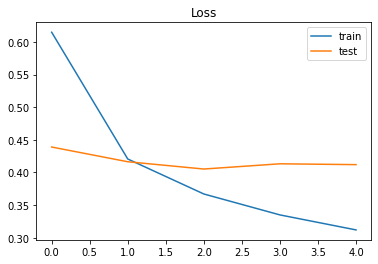

In [74]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss_curve.jpeg')
plt.show()

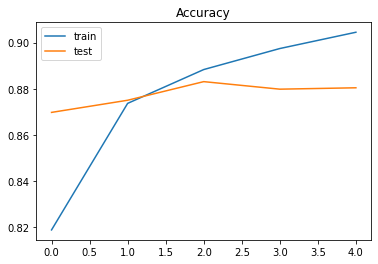

In [75]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();

In [76]:
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram,y_train, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.85      0.66      0.75      1906
           Booking of Luggage / Parcels / Goods       0.92      0.83      0.87      1442
                         Bribery and corruption       0.61      0.05      0.10       209
                  Catering and Vending Services       0.84      0.76      0.80      3639
                           Emergency Assistance       0.50      0.04      0.07        79
                           Feedback/Suggestions       0.72      0.09      0.15       481
Improper behaviour of non railway/railway staff       0.49      0.25      0.33      1385
                      Maintenance / Cleanliness       0.61      0.84      0.70      8191
         Malfunctioning of Electrical Equipment       0.88      0.85      0.87      8093
                  Non availability of Water Sub       0.86      0.79      0.82      4125
                    